#####LOADING THE DATASET
~ Performing data analysis & data preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ransomeware_Merged_File/ransomware_merged.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.shape

(2830743, 79)

In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
df.isnull().sum().sum()

1358

In [ ]:
cols_with_missing = df.columns[df.isnull().any()]
print(cols_with_missing)

Index(['Flow Bytes/s'], dtype='object')


In [ ]:
df['Flow Bytes/s'].describe()

,Flow Bytes/s
count,2.829385e+06
mean,inf
std,NaN
min,-2.610000e+08
25%,1.193197e+02
50%,4.595549e+03
75%,1.666667e+05
max,inf


In [ ]:
df['Flow Bytes/s']

,Flow Bytes/s
0,4.000000e+06
1,1.100917e+05
2,2.307692e+05
3,3.529412e+05
4,4.000000e+06
...,...
2830738,8.194940e+03
2830739,1.376543e+06
2830740,4.512195e+05
2830741,4.272221e+02


In [ ]:
import pandas as pd
import numpy as np

# Count the number of rows with infinite values in the 'Flow Bytes/s' column
infinite_rows_count = df['Flow Bytes/s'].isin([np.inf, -np.inf]).sum()

print(f"Number of rows with infinite values in 'Flow Bytes/s': {infinite_rows_count}")

Number of rows with infinite values in 'Flow Bytes/s': 1509


In [ ]:
import pandas as pd
import numpy as np

# Check for infinite values and count them
infinite_counts = df.isin([np.inf, -np.inf]).sum()

# Filter to show only columns with infinite values
columns_with_infinite_values = infinite_counts[infinite_counts > 0]

# Display the columns and their respective counts of infinite values
print("Columns with infinite values and their counts:")
print(columns_with_infinite_values)

Columns with infinite values and their counts:
Flow Bytes/s       1509
 Flow Packets/s    2867
dtype: int64


In [ ]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr(method='pearson', numeric_only=True)

# Set the threshold
threshold = 0.5

# Get correlations with 'Flow Bytes' and 'Flow Duration'
flow_bytes_correlations = correlation_matrix['Flow Bytes/s']
flow_duration_correlations = correlation_matrix[' Flow Packets/s']

# Filter columns with correlations above the threshold
flow_bytes_filtered = flow_bytes_correlations[flow_bytes_correlations.abs() > threshold]
flow_duration_filtered = flow_duration_correlations[flow_duration_correlations.abs() > threshold]

# Print the columns that correlate with 'Flow Bytes' and 'Flow Duration'
print("Columns correlated with 'Flow Bytes/s' (threshold > 0.5):")
print(flow_bytes_filtered)

print("\nColumns correlated with 'Flow Packets/s' (threshold > 0.5):")
print(flow_duration_filtered)

Columns correlated with 'Flow Bytes/s' (threshold > 0.5):
Flow Bytes/s    1.0
Name: Flow Bytes/s, dtype: float64

Columns correlated with 'Flow Packets/s' (threshold > 0.5):
 Flow Packets/s    1.000000
Fwd Packets/s      0.987562
Name:  Flow Packets/s, dtype: float64


In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3204828.5,119999998.0
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,5.829582e+04,5.770923e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8.316037e+06,2.363008e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,5.038439e+05,4.602984e+06,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8.695752e+06,2.436689e+07,0.0,0.0,0.0,0.0,120000000.0


In [ ]:
df.corr(method='pearson', numeric_only=True).T

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.151680,-0.004236,-0.003947,0.011145,-0.003082,0.097926,-0.045388,0.140220,0.128861,...,-0.003226,0.000897,-0.035562,-0.043717,-0.051859,-0.023194,-0.112585,0.010399,-0.108185,-0.114614
Flow Duration,-0.151680,1.000000,0.020857,0.019670,0.065456,0.016186,0.273308,-0.105230,0.143689,0.234437,...,0.015942,-0.001357,0.189299,0.241060,0.294034,0.121171,0.768034,0.243154,0.779527,0.738328
Total Fwd Packets,-0.004236,0.020857,1.000000,0.999070,0.365508,0.996993,0.009358,-0.002989,0.000032,0.001403,...,0.887387,-0.000184,0.039937,0.008329,0.030459,0.041283,0.001820,0.000809,0.001906,0.001670
Total Backward Packets,-0.003947,0.019670,0.999070,1.000000,0.359451,0.994429,0.009039,-0.002600,-0.000333,0.001026,...,0.882566,0.000018,0.038963,0.006437,0.028602,0.041278,0.001425,0.000492,0.001456,0.001330
Total Length of Fwd Packets,0.011145,0.065456,0.365508,0.359451,1.000000,0.353762,0.197030,-0.000275,0.185262,0.159787,...,0.407448,-0.001209,0.101084,0.103326,0.126493,0.068325,0.022660,0.027064,0.026079,0.018634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.023194,0.121171,0.041283,0.041278,0.068325,0.039069,0.105641,-0.025912,0.081170,0.094164,...,0.031394,-0.006834,0.905862,0.033874,0.584503,1.000000,0.118133,0.038302,0.122651,0.112880
Idle Mean,-0.112585,0.768034,0.001820,0.001425,0.022660,0.000809,0.181135,-0.071304,0.127959,0.183139,...,0.000837,-0.000876,0.120171,0.036551,0.088904,0.118133,1.000000,0.150248,0.990387,0.990215
Idle Std,0.010399,0.243154,0.000809,0.000492,0.027064,0.000105,0.178091,-0.029951,0.178462,0.191278,...,0.000721,-0.003720,0.070586,0.081435,0.070002,0.038302,0.150248,1.000000,0.283330,0.011609
Idle Max,-0.108185,0.779527,0.001906,0.001456,0.026079,0.000797,0.199559,-0.073419,0.148402,0.203304,...,0.000929,-0.001407,0.132700,0.055300,0.102816,0.122651,0.990387,0.283330,1.000000,0.961812


In [ ]:
df[' Label'].value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr(method='pearson', numeric_only=True)

# Threshold value
threshold = 0.7

# Dictionary to store the count of correlated columns for each column
correlation_counts = {}

# Loop through each column
for col in corr_matrix.columns:
    # Find columns that are correlated with the current column and have correlation >= threshold
    correlated_cols = corr_matrix[col][corr_matrix[col].abs() >= threshold]
    correlated_cols = correlated_cols[correlated_cols.index != col]  # Exclude the column itself

    # Store the count of correlated columns
    correlation_counts[col] = len(correlated_cols)

    # If there are correlated columns, print them
    if not correlated_cols.empty:
        print(f"\nColumns correlated with {col}:")
        for correlated_col, corr_value in correlated_cols.items():
            print(f"  {correlated_col}: {corr_value:.2f}")

# Find the column with the most correlated columns
most_correlated_column = max(correlation_counts, key=correlation_counts.get)
max_count = correlation_counts[most_correlated_column]

# Print the result
print(f"\nColumn with the most correlated columns is '{most_correlated_column}' with {max_count} correlated columns.")


Columns correlated with  Flow Duration:
   Flow IAT Std: 0.74
   Flow IAT Max: 0.78
  Fwd IAT Total: 1.00
   Fwd IAT Std: 0.73
   Fwd IAT Max: 0.78
  Bwd IAT Total: 0.82
  Idle Mean: 0.77
   Idle Max: 0.78
   Idle Min: 0.74

Columns correlated with  Total Fwd Packets:
   Total Backward Packets: 1.00
   Total Length of Bwd Packets: 1.00
  Subflow Fwd Packets: 1.00
   Subflow Bwd Packets: 1.00
   Subflow Bwd Bytes: 1.00
   act_data_pkt_fwd: 0.89

Columns correlated with  Total Backward Packets:
   Total Fwd Packets: 1.00
   Total Length of Bwd Packets: 0.99
  Subflow Fwd Packets: 1.00
   Subflow Bwd Packets: 1.00
   Subflow Bwd Bytes: 0.99
   act_data_pkt_fwd: 0.88

Columns correlated with Total Length of Fwd Packets:
   Subflow Fwd Bytes: 1.00

Columns correlated with  Total Length of Bwd Packets:
   Total Fwd Packets: 1.00
   Total Backward Packets: 0.99
  Subflow Fwd Packets: 1.00
   Subflow Bwd Packets: 0.99
   Subflow Bwd Bytes: 1.00
   act_data_pkt_fwd: 0.88

Columns correlated wi

In [ ]:
import pandas as pd

# 1. Ratio of Forward to Backward Packets
df['Fwd_Bwd_Packet_Ratio'] = df.apply(
    lambda row: row[' Total Fwd Packets'] / row[' Total Backward Packets'] if row[' Total Backward Packets'] != 0 else 0, axis=1
)

# 2. Cumulative Bytes Transferred
df['Cumulative_Bytes'] = df['Total Length of Fwd Packets'] + df[' Total Length of Bwd Packets']

# Optional: Group data by Flow Duration and calculate cumulative sums
df_grouped_by_duration = df.groupby(' Flow Duration').sum().reset_index()

# View the updated DataFrame
print("Original DataFrame with new features:")
df.head()

Original DataFrame with new features:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Fwd_Bwd_Packet_Ratio,Cumulative_Bytes
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0.0,12
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,1.0,12
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,1.0,12
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,1.0,12
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0.0,12


In [ ]:
# View the cumulative sums grouped by Flow Duration
print("\nCumulative sums grouped by Flow Duration:")
df_grouped_by_duration


Cumulative sums grouped by Flow Duration:


,Flow Duration,Destination Port,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Fwd_Bwd_Packet_Ratio,Cumulative_Bytes
0,-13,34040,1,1,6,0,6,6,6.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGN,1.000000,6
1,-12,39150,2,2,12,8,12,12,12.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGNBENIGN,2.000000,20
2,-4,80,1,1,0,0,0,0,0.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGN,1.000000,0
3,-2,64761,2,2,12,8,12,12,12.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGNBENIGN,2.000000,20
4,-1,1855105,109,109,474,774,474,474,474.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGNBENIGNBENIGNBENIGNBENIGNBENIGNBENIGNBENI...,109.000000,1248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050894,119999987,443,25,22,1876,1314,869,6,75.040000,238.953880,...,233.105126,144026,143314,9.856401e+06,346106.161337,10029305,9107055,BENIGN,1.136364,3190
1050895,119999992,886,8,5,420,542,346,0,88.266667,154.456090,...,541450.754207,765824,97,1.196000e+08,541776.023394,120000000,119200000,BENIGNBENIGN,3.166667,962
1050896,119999993,886,31,26,2078,1575,1161,0,122.133333,355.850939,...,497660.712247,830400,126280,6.947350e+07,791561.394300,70000000,68443490,BENIGNBENIGN,2.636364,3653
1050897,119999997,443,6,3,308,349,276,0,51.333333,110.805535,...,322147.950000,455670,84,5.980000e+07,322549.586700,60000000,59500000,BENIGN,2.000000,657


In [ ]:
df[' Flow Packets/s'].describe()

,Flow Packets/s
count,2.830743e+06
mean,inf
std,NaN
min,-2.000000e+06
25%,3.446226e+00
50%,1.106684e+02
75%,2.325581e+04
max,inf


In [ ]:
columns_to_keep = [
    ' Flow Duration',
    ' Total Fwd Packets',
    ' Total Backward Packets',
    ' SYN Flag Count',
    ' Flow IAT Mean',
    ' ACK Flag Count',
    'Active Mean',
    'Total Length of Fwd Packets',
    ' PSH Flag Count',
    ' Average Packet Size',
    ' Fwd IAT Mean',
    ' Bwd IAT Mean',
    ' Bwd IAT Std',
    ' Bwd IAT Max',
    ' Bwd IAT Min',
    'Fwd_Bwd_Packet_Ratio',
    'Cumulative_Bytes',
    ' Label',
]


# Select only the specified columns
df_selected = df[columns_to_keep]

# Optional: Reset the index if needed000000
df_selected.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print("Selected columns for ransomware detection:")
df_selected.head()

Selected columns for ransomware detection:


,Flow Duration,Total Fwd Packets,Total Backward Packets,SYN Flag Count,Flow IAT Mean,ACK Flag Count,Active Mean,Total Length of Fwd Packets,PSH Flag Count,Average Packet Size,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd_Bwd_Packet_Ratio,Cumulative_Bytes,Label
0,3,2,0,0,3.0,1,0.0,12,0,9.0,3.0,0.0,0.0,0,0,0.0,12,BENIGN
1,109,1,1,0,109.0,1,0.0,6,0,9.0,0.0,0.0,0.0,0,0,1.0,12,BENIGN
2,52,1,1,0,52.0,1,0.0,6,0,9.0,0.0,0.0,0.0,0,0,1.0,12,BENIGN
3,34,1,1,0,34.0,1,0.0,6,0,9.0,0.0,0.0,0.0,0,0,1.0,12,BENIGN
4,3,2,0,0,3.0,1,0.0,12,0,9.0,3.0,0.0,0.0,0,0,0.0,12,BENIGN


In [ ]:
df = df_selected

In [ ]:
df.corr(method='pearson', numeric_only=True).T

,Flow Duration,Total Fwd Packets,Total Backward Packets,SYN Flag Count,Flow IAT Mean,ACK Flag Count,Active Mean,Total Length of Fwd Packets,PSH Flag Count,Average Packet Size,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd_Bwd_Packet_Ratio,Cumulative_Bytes
Flow Duration,1.000000,0.020857,0.019670,-0.010856,0.536317,0.027928,0.189299,0.065456,0.166839,0.410007,0.548486,0.413574,0.522389,0.585330,0.216291,0.070522,0.016450
Total Fwd Packets,0.020857,1.000000,0.999070,0.001927,-0.001013,0.001223,0.039937,0.365508,0.006591,0.022101,-0.001028,-0.000633,0.000763,0.003414,-0.001001,-0.000630,0.997041
Total Backward Packets,0.019670,0.999070,1.000000,0.001711,-0.001366,0.001004,0.038963,0.359451,0.006107,0.022496,-0.001220,-0.000798,0.000550,0.003483,-0.000962,-0.001646,0.994455
SYN Flag Count,-0.010856,0.001927,0.001711,1.000000,0.057242,0.323684,0.004660,0.008976,-0.143184,-0.055003,0.022408,0.042988,-0.005016,0.018907,0.046880,0.119548,0.001699
Flow IAT Mean,0.536317,-0.001013,-0.001366,0.057242,1.000000,0.088846,0.065382,0.004353,-0.062193,0.177760,0.900288,0.626058,0.260841,0.485454,0.565590,0.015930,-0.001350
ACK Flag Count,0.027928,0.001223,0.001004,0.323684,0.088846,1.000000,-0.026610,-0.004006,-0.440547,-0.087903,0.030995,-0.073985,-0.088095,-0.098388,-0.038478,-0.124367,0.002121
Active Mean,0.189299,0.039937,0.038963,0.004660,0.065382,-0.026610,1.000000,0.101084,0.112015,0.082354,0.044243,0.046094,0.090029,0.120985,0.015141,0.016063,0.036345
Total Length of Fwd Packets,0.065456,0.365508,0.359451,0.008976,0.004353,-0.004006,0.101084,1.000000,0.041750,0.077999,0.005904,0.007749,0.036394,0.041894,-0.004392,0.080632,0.357616
PSH Flag Count,0.166839,0.006591,0.006107,-0.143184,-0.062193,-0.440547,0.112015,0.041750,1.000000,0.248775,-0.074617,-0.020329,0.044983,0.024027,-0.066544,0.098525,0.003750
Average Packet Size,0.410007,0.022101,0.022496,-0.055003,0.177760,-0.087903,0.082354,0.077999,0.248775,1.000000,0.184802,0.044014,0.285653,0.255915,-0.037953,0.084943,0.021531


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.dtypes

,0
Flow Duration,int64
Total Fwd Packets,int64
Total Backward Packets,int64
SYN Flag Count,int64
Flow IAT Mean,float64
ACK Flag Count,int64
Active Mean,float64
Total Length of Fwd Packets,int64
PSH Flag Count,int64
Average Packet Size,float64


In [ ]:
import pandas as pd

# Perform one-hot encoding on the 'Label' column
df_encoded = pd.get_dummies(df, columns=[' Label'], prefix='Label', dtype=int)

In [ ]:
df_encoded.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,SYN Flag Count,Flow IAT Mean,ACK Flag Count,Active Mean,Total Length of Fwd Packets,PSH Flag Count,Average Packet Size,...,Label_DoS Slowhttptest,Label_DoS slowloris,Label_FTP-Patator,Label_Heartbleed,Label_Infiltration,Label_PortScan,Label_SSH-Patator,Label_Web Attack � Brute Force,Label_Web Attack � Sql Injection,Label_Web Attack � XSS
0,3,2,0,0,3.0,1,0.0,12,0,9.0,...,0,0,0,0,0,0,0,0,0,0
1,109,1,1,0,109.0,1,0.0,6,0,9.0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,1,0,52.0,1,0.0,6,0,9.0,...,0,0,0,0,0,0,0,0,0,0
3,34,1,1,0,34.0,1,0.0,6,0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,0,0,3.0,1,0.0,12,0,9.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.shape

(2830743, 32)

In [ ]:
df_encoded.columns

Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       ' SYN Flag Count', ' Flow IAT Mean', ' ACK Flag Count', 'Active Mean',
       'Total Length of Fwd Packets', ' PSH Flag Count',
       ' Average Packet Size', ' Fwd IAT Mean', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd_Bwd_Packet_Ratio',
       'Cumulative_Bytes', 'Label_BENIGN', 'Label_Bot', 'Label_DDoS',
       'Label_DoS GoldenEye', 'Label_DoS Hulk', 'Label_DoS Slowhttptest',
       'Label_DoS slowloris', 'Label_FTP-Patator', 'Label_Heartbleed',
       'Label_Infiltration', 'Label_PortScan', 'Label_SSH-Patator',
       'Label_Web Attack � Brute Force', 'Label_Web Attack � Sql Injection',
       'Label_Web Attack � XSS'],
      dtype='object')

In [ ]:
# Strip any leading/trailing spaces from the column names
df_encoded.columns = df_encoded.columns.str.strip()
# Replace special character with a hyphen
df_encoded.columns = df_encoded.columns.str.replace('�', '-')

####FEATURE SELECTION AND DATA SPLITTING



In [ ]:
# Replace special character with a hyphen
df.columns = df.columns.str.replace('�', '-')

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(columns=[
    'Label_BENIGN',
    'Label_Bot',
    'Label_DDoS',
    'Label_DoS GoldenEye',
    'Label_DoS Hulk',
    'Label_DoS Slowhttptest',
    'Label_DoS slowloris',
    'Label_FTP-Patator',
    'Label_Heartbleed',
    'Label_Infiltration',
    'Label_PortScan',
    'Label_SSH-Patator',
    'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection',
    'Label_Web Attack - XSS'
])  # Features

y = df_encoded[[
    'Label_BENIGN',
    'Label_Bot',
    'Label_DDoS',
    'Label_DoS GoldenEye',
    'Label_DoS Hulk',
    'Label_DoS Slowhttptest',
    'Label_DoS slowloris',
    'Label_FTP-Patator',
    'Label_Heartbleed',
    'Label_Infiltration',
    'Label_PortScan',
    'Label_SSH-Patator',
    'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection',
    'Label_Web Attack - XSS'
]]  # Target variables

In [ ]:
from sklearn.model_selection import train_test_split

# First split: Split X and y into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Second split: Further split training data into training and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

X_val_normalized = scaler.transform(X_val)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler on the training data and transform it
# X_train_normalized = scaler.fit_transform(X_train)

# # Transform the test data using the same scaler
# X_test_normalized = scaler.transform(X_test)

# # Transform the validation data using the same scaler
# X_val_normalized = scaler.transform(X_val)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1811675, 17)
(566149, 17)
(1811675, 15)
(566149, 15)


SVM

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# # Assuming y_train is in one-hot encoded format, convert it to class labels
# y_train_labels = np.argmax(y_train.to_numpy(), axis=1)

# # Define the parameter grid for grid search
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Specify kernel types
#     'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’
# }

# # Create an SVM classifier
# svm = SVC(class_weight='balanced', random_state=1)

# # Create GridSearchCV
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the data to perform grid search
# grid_search.fit(X_train_normalized, y_train_labels)  # Use y_train_labels instead of y_train

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Create the final SVM classifier using the best parameters
# svm_final = SVC(C=best_params['C'],
#                 kernel=best_params['kernel'],
#                 gamma=best_params['gamma'],
#                 class_weight='balanced',
#                 random_state=1)

# # Optionally fit the final model on the whole training data
# svm_final.fit(X_train_normalized, y_train_labels)

In [ ]:
y_train_encoded = y_train.idxmax(axis=1).values  # Convert one-hot encoded DataFrame to class indices

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, -1],  # -1 indicates no limit in LightGBM
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'num_leaves': [31, 50, 100],  # LightGBM uses 'num_leaves' instead of depth directly
    'boosting_type': ['gbdt']  # Gradient Boosting Decision Tree
}

# Create a LightGBM classifier
lgb_clf = lgb.LGBMClassifier(objective='binary',
                             random_state=1)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the data to perform grid search
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters
print("Best Parameters:", best_params)

# Create the final LightGBM classifier using the best parameters
lgb_final = lgb.LGBMClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               learning_rate=best_params['learning_rate'],
                               subsample=best_params['subsample'],
                               num_leaves=best_params['num_leaves'],
                               objective='binary',
                               random_state=1)

# Train the final model
lgb_final.fit(X_train_normalized, y_train)

NameError: name 'num_classes' is not defined

#### XGBOOST CLASSIFIER WITHOUT RESAMPLING OF THE MINORITY CLASS

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                             eval_metric='logloss',
                             random_state=1,
                             use_label_encoder=False)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the data to perform grid search
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters
print("Best Parameters:", best_params)

# Create the final XGBoost classifier using the best parameters
xgb_final = xgb.XGBClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               learning_rate=best_params['learning_rate'],
                               subsample=best_params['subsample'],
                               objective='binary:logistic',
                               eval_metric='logloss',
                               random_state=1,
                               use_label_encoder=False)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}


In [ ]:
#Fitting the model
xgb_final.fit(X_train_normalized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Predicting on the validation set
y_val_pred = xgb_final.predict(X_val_normalized)

In [ ]:
import time

# Start time
start_time = time.time()

# Make predictions
y_pred = xgb_final.predict(X_test_normalized)

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Time taken for predicting:", execution_time, "seconds")

Time taken for predicting: 4.8012237548828125 seconds


In [ ]:
# Define the number of data points you want to test
num_data_points = [1, 50, 100, 500,5000]

for num_points in num_data_points:
    # Take a subset of X_test_normalized with the specified number of data points
    X_subset = X_test_normalized[:num_points]

    # Start time
    start_time = time.time()

    # Make predictions
    y_pred = xgb_final.predict(X_subset)

    # End time
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    print("Time taken for predicting", num_points, "data points:", execution_time, "seconds")

Time taken for predicting 1 data points: 0.029439449310302734 seconds
Time taken for predicting 50 data points: 0.02293086051940918 seconds
Time taken for predicting 100 data points: 0.020554304122924805 seconds
Time taken for predicting 500 data points: 0.0275421142578125 seconds
Time taken for predicting 5000 data points: 0.07619953155517578 seconds


In [ ]:
from sklearn.metrics import accuracy_score
# Calculating accuracy on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Once you're satisfied with the model performance on the validation set, you can evaluate it on the test set
y_pred = xgb_final.predict(X_test_normalized)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9849575751955648
Test Accuracy: 0.9851364216840444


In [ ]:
# Evaluating the model using mean squared error, mean absolute error, r2_score, and root mean squared error.
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
print("Accuracy Score ",metrics.accuracy_score(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error',mae)
mse = mse(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared value: ',rmse)

Accuracy Score  0.9851364216840444
Mean Absolute Error 0.0019420093768012783
Mean Squared Error: 0.0019420093768012783
Root Mean Squared value:  0.04406823546276023


In [ ]:
# Predict probabilities for each class
y_pred_proba = xgb_final.predict_proba(X_test_normalized)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC-AUC for multiclass (One-vs-Rest) using predicted probabilities
# Assuming `y_pred_proba` contains the predicted probabilities for each class
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Precision: 0.9860888459536004
Recall: 0.985443761271326
F1 Score: 0.9850749276947242
ROC-AUC Score: 0.9989369659106568


In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Log Loss: 0.034847949269534245


In [ ]:
#Classification Report for the results
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    454620
           1       0.92      0.40      0.56       393
           2       1.00      1.00      1.00     25606
           3       0.96      0.97      0.96      2059
           4       0.90      0.97      0.93     46215
           5       0.93      0.99      0.96      1100
           6       1.00      0.99      0.99      1159
           7       1.00      0.98      0.99      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      1.00      1.00     31786
          11       1.00      0.51      0.67      1179
          12       1.00      0.09      0.17       301
          13       0.00      0.00      0.00         4
          14       1.00      0.01      0.02       130

   micro avg       0.99      0.99      0.99    566149
   macro avg       0.91      0.70      0.73    566149
weighted avg       0.99   

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the class labels
class_labels = [
    'Label_BENIGN', 'Label_Bot', 'Label_DDoS', 'Label_DoS GoldenEye',
    'Label_DoS Hulk', 'Label_DoS Slowhttptest', 'Label_DoS slowloris',
    'Label_FTP-Patator', 'Label_Heartbleed', 'Label_Infiltration',
    'Label_PortScan', 'Label_SSH-Patator', 'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection', 'Label_Web Attack - XSS'
]

# Compute multilabel confusion matrix
multi_conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

# Print the confusion matrix for each label
for i, label in enumerate(class_labels):
    print(f"Confusion Matrix for {label}:")
    print(multi_conf_matrix[i])
    print("\n")

Confusion Matrix for Label_BENIGN:
[[108895   2634]
 [  5609 449011]]


Confusion Matrix for Label_Bot:
[[565743     13]
 [   235    158]]


Confusion Matrix for Label_DDoS:
[[540501     42]
 [    40  25566]]


Confusion Matrix for Label_DoS GoldenEye:
[[564000     90]
 [    65   1994]]


Confusion Matrix for Label_DoS Hulk:
[[514756   5178]
 [  1236  44979]]


Confusion Matrix for Label_DoS Slowhttptest:
[[564963     86]
 [    13   1087]]


Confusion Matrix for Label_DoS slowloris:
[[564986      4]
 [     8   1151]]


Confusion Matrix for Label_FTP-Patator:
[[564555      6]
 [    29   1559]]


Confusion Matrix for Label_Heartbleed:
[[566147      0]
 [     0      2]]


Confusion Matrix for Label_Infiltration:
[[566142      0]
 [     3      4]]


Confusion Matrix for Label_PortScan:
[[534166    197]
 [    14  31772]]


Confusion Matrix for Label_SSH-Patator:
[[564969      1]
 [   583    596]]


Confusion Matrix for Label_Web Attack - Brute Force:
[[565848      0]
 [   273     28]]


Con

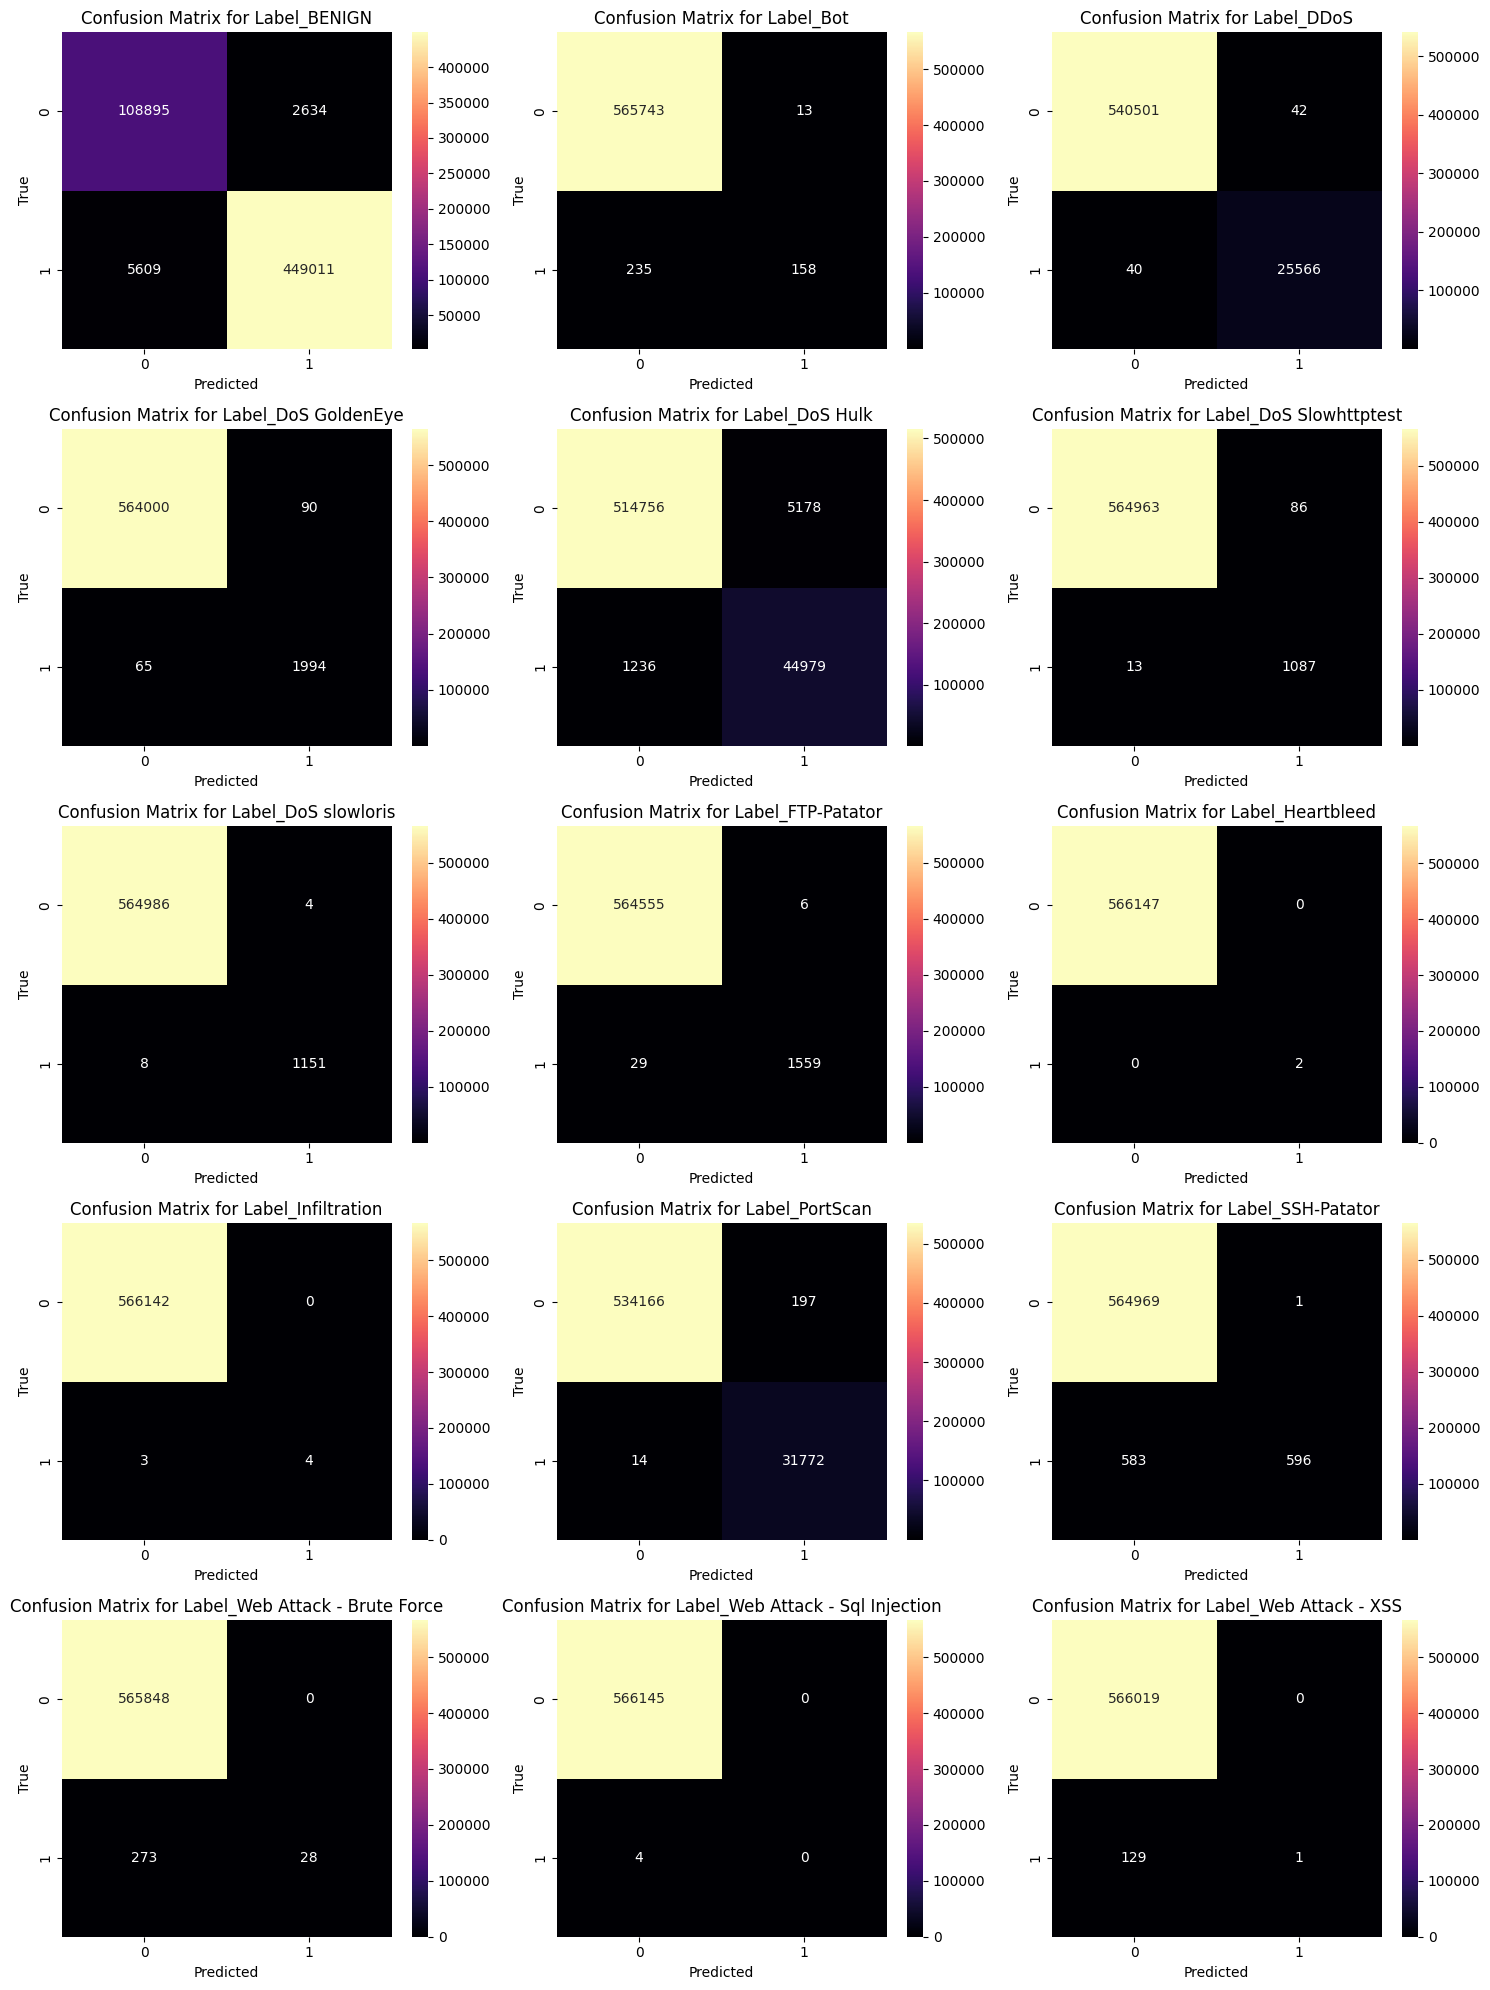

In [ ]:
# Plot confusion matrices for each label
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, label in enumerate(class_labels):
    sns.heatmap(multi_conf_matrix[i], annot=True, fmt='d', cmap='magma', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

RESAMPLING THE MINORITY CLASS
~ +10000 FEATURES

In [ ]:
# Iterate through each column (label) in the DataFrame
for i in range(y_train.shape[1]):
    # Extract the column as a Series (no need to explicitly convert to pd.Series)
    y_train_series = y_train.iloc[:, i]

    # Calculate and print the class distribution for the current label
    class_distribution = y_train_series.value_counts()
    print(f"Class distribution for label {i+1} before oversampling:\n{class_distribution}\n")

Class distribution for label 1 before oversampling:
Label_BENIGN
1    1454782
0     356893
Name: count, dtype: int64

Class distribution for label 2 before oversampling:
Label_Bot
0    1810417
1       1258
Name: count, dtype: int64

Class distribution for label 3 before oversampling:
Label_DDoS
0    1729738
1      81937
Name: count, dtype: int64

Class distribution for label 4 before oversampling:
Label_DoS GoldenEye
0    1805088
1       6587
Name: count, dtype: int64

Class distribution for label 5 before oversampling:
Label_DoS Hulk
0    1663789
1     147886
Name: count, dtype: int64

Class distribution for label 6 before oversampling:
Label_DoS Slowhttptest
0    1808156
1       3519
Name: count, dtype: int64

Class distribution for label 7 before oversampling:
Label_DoS slowloris
0    1807965
1       3710
Name: count, dtype: int64

Class distribution for label 8 before oversampling:
Label_FTP-Patator
0    1806595
1       5080
Name: count, dtype: int64

Class distribution for label 9

In [ ]:
# Iterate through each column (label) in the DataFrame
for i in range(y_train.shape[1]):
    # Extract the column as a Series
    y_train_series = y_train.iloc[:, i]

    # Calculate the class distribution for the current label
    class_distribution = y_train_series.value_counts()

    # Identify the minority class (class with the minimum count)
    minority_class = class_distribution.idxmin()

    # Print the class distribution and minority class
    print(f"Class distribution for label {i+1}:\n{class_distribution}\n")
    print(f"Minority class for label {i+1}: {minority_class} (Count: {class_distribution[minority_class]})\n")

Class distribution for label 1:
Label_BENIGN
1    1454782
0     356893
Name: count, dtype: int64

Minority class for label 1: 0 (Count: 356893)

Class distribution for label 2:
Label_Bot
0    1810417
1       1258
Name: count, dtype: int64

Minority class for label 2: 1 (Count: 1258)

Class distribution for label 3:
Label_DDoS
0    1729738
1      81937
Name: count, dtype: int64

Minority class for label 3: 1 (Count: 81937)

Class distribution for label 4:
Label_DoS GoldenEye
0    1805088
1       6587
Name: count, dtype: int64

Minority class for label 4: 1 (Count: 6587)

Class distribution for label 5:
Label_DoS Hulk
0    1663789
1     147886
Name: count, dtype: int64

Minority class for label 5: 1 (Count: 147886)

Class distribution for label 6:
Label_DoS Slowhttptest
0    1808156
1       3519
Name: count, dtype: int64

Minority class for label 6: 1 (Count: 3519)

Class distribution for label 7:
Label_DoS slowloris
0    1807965
1       3710
Name: count, dtype: int64

Minority class for

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

# Step 1: Count occurrences of each class in y_train
class_counts = y_train.sum(axis=0)  # Sum occurrences for each label
print("Class counts before oversampling:\n", class_counts)

# Step 2: Identify minority classes and duplicate
# Define the threshold below which a class is considered minority
threshold = 5000  # Adjust this based on the dataset size and needs
minority_classes = class_counts[class_counts < threshold].index.tolist()

Class counts before oversampling:
 Label_BENIGN                        1454782
Label_Bot                              1258
Label_DDoS                            81937
Label_DoS GoldenEye                    6587
Label_DoS Hulk                       147886
Label_DoS Slowhttptest                 3519
Label_DoS slowloris                    3710
Label_FTP-Patator                      5080
Label_Heartbleed                          7
Label_Infiltration                       23
Label_PortScan                       101715
Label_SSH-Patator                      3774
Label_Web Attack - Brute Force          965
Label_Web Attack - Sql Injection         14
Label_Web Attack - XSS                  418
dtype: int64


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

# Step 1: Count occurrences of each class in y_train
class_counts = y_train.sum(axis=0)  # Sum occurrences for each label
print("Class counts before oversampling:\n", class_counts)

# Step 2: Identify minority classes and oversample
# Define the target size for oversampling
target_size = 10000

# For each minority class, duplicate samples until we reach the target size
for minority_class in minority_classes:
    current_count = class_counts[minority_class]

    if current_count < target_size:
        # Find the number of duplicates needed
        duplicates_needed = target_size // current_count  # How many times to duplicate
        remainder = target_size % current_count  # Handle the remainder

        # Get the samples for the minority class
        minority_class_indices = y_train[y_train[minority_class] == 1].index

        # Duplicate the minority class samples
        X_minority_class = X_train.loc[minority_class_indices]
        y_minority_class = y_train.loc[minority_class_indices]

        # Append these samples multiple times (duplicates_needed times)
        X_train = pd.concat([X_train] + [X_minority_class] * duplicates_needed, axis=0)
        y_train = pd.concat([y_train] + [y_minority_class] * duplicates_needed, axis=0)

        # If there are any remaining samples needed, add a few more from the minority class
        if remainder > 0:
            X_train = pd.concat([X_train, X_minority_class.sample(remainder, random_state=0)])
            y_train = pd.concat([y_train, y_minority_class.sample(remainder, random_state=0)])

# Shuffle the data after oversampling
X_train, y_train = X_train.sample(frac=1, random_state=0), y_train.sample(frac=1, random_state=0)

# Check class counts after oversampling
class_counts_after = y_train.sum(axis=0)
print("Class counts after oversampling:\n", class_counts_after)

Class counts before oversampling:
 Label_BENIGN                        1454782
Label_Bot                              1258
Label_DDoS                            81937
Label_DoS GoldenEye                    6587
Label_DoS Hulk                       147886
Label_DoS Slowhttptest                 3519
Label_DoS slowloris                    3710
Label_FTP-Patator                      5080
Label_Heartbleed                          7
Label_Infiltration                       23
Label_PortScan                       101715
Label_SSH-Patator                      3774
Label_Web Attack - Brute Force          965
Label_Web Attack - Sql Injection         14
Label_Web Attack - XSS                  418
dtype: int64
Class counts after oversampling:
 Label_BENIGN                        1454782
Label_Bot                             11258
Label_DDoS                            81937
Label_DoS GoldenEye                    6587
Label_DoS Hulk                       147886
Label_DoS Slowhttptest                

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

X_val_normalized = scaler.transform(X_val)

In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
print(X_train_normalized.shape)
print(X_test_normalized.shape)
print(X_val_normalized.shape)

(1901675, 15)
(566149, 15)
(452919, 15)
(1901675, 17)
(566149, 17)
(452919, 17)


####XGBOOST CLASSIFIER AFTER RESAMPLING

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                             eval_metric='logloss',
                             random_state=1,
                             use_label_encoder=False)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the data to perform grid search
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters
print("Best Parameters:", best_params)

# Create the final XGBoost classifier using the best parameters
xgb_final = xgb.XGBClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               learning_rate=best_params['learning_rate'],
                               subsample=best_params['subsample'],
                               objective='binary:logistic',
                               eval_metric='logloss',
                               random_state=1,
                               use_label_encoder=False)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
# Train the final model
xgb_final.fit(X_train_normalized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Predicting on the validation set
y_val_pred = xgb_final.predict(X_val_normalized)

In [ ]:
import time

# Start time
start_time = time.time()

# Make predictions
y_pred = xgb_final.predict(X_test_normalized)

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Time taken for predicting:", execution_time, "seconds")

Time taken for predicting: 4.47186541557312 seconds


In [ ]:
# Define the number of data points you want to test
num_data_points = [1, 50, 100, 500,5000]

for num_points in num_data_points:
    # Take a subset of X_test_normalized with the specified number of data points
    X_subset = X_test_normalized[:num_points]

    # Start time
    start_time = time.time()

    # Make predictions
    y_pred = xgb_final.predict(X_subset)

    # End time
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    print("Time taken for predicting", num_points, "data points:", execution_time, "seconds")

Time taken for predicting 1 data points: 0.02282857894897461 seconds
Time taken for predicting 50 data points: 0.015898942947387695 seconds
Time taken for predicting 100 data points: 0.0234529972076416 seconds
Time taken for predicting 500 data points: 0.026514053344726562 seconds
Time taken for predicting 5000 data points: 0.06751251220703125 seconds


In [ ]:
from sklearn.metrics import accuracy_score
# Calculating accuracy on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Once you're satisfied with the model performance on the validation set, you can evaluate it on the test set
y_pred = xgb_final.predict(X_test_normalized)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9781329553408005
Test Accuracy: 0.9782195146507369


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # For multi-class, use 'weighted' or 'macro'
print('F1 Score:', f1)

# Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)

Accuracy Score: 0.9782195146507369
F1 Score: 0.9820169438851778
Precision: 0.9861872605066782
Recall: 0.9785745448636313


In [ ]:
# Predict probabilities for each class
y_pred_proba = xgb_final.predict_proba(X_test_normalized)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC-AUC for multiclass (One-vs-Rest) using predicted probabilities
# Assuming `y_pred_proba` contains the predicted probabilities for each class
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Precision: 0.9861872605066782
Recall: 0.9785745448636313
F1 Score: 0.9820169438851778
ROC-AUC Score: 0.9985297452681402


In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Log Loss: 0.04440775679851716


In [ ]:
#Classification Report for the results
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    454620
           1       0.61      0.61      0.61       393
           2       1.00      1.00      1.00     25606
           3       0.95      0.98      0.96      2059
           4       0.90      0.97      0.93     46215
           5       0.93      0.99      0.96      1100
           6       0.99      0.99      0.99      1159
           7       0.99      0.98      0.99      1588
           8       1.00      1.00      1.00         2
           9       0.03      0.57      0.05         7
          10       0.99      1.00      1.00     31786
          11       1.00      0.51      0.67      1179
          12       0.23      0.13      0.17       301
          13       0.00      0.25      0.00         4
          14       0.04      0.04      0.04       130

   micro avg       0.98      0.98      0.98    566149
   macro avg       0.71      0.73      0.69    566149
weighted avg       0.99   

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the class labels
class_labels = [
    'Label_BENIGN', 'Label_Bot', 'Label_DDoS', 'Label_DoS GoldenEye',
    'Label_DoS Hulk', 'Label_DoS Slowhttptest', 'Label_DoS slowloris',
    'Label_FTP-Patator', 'Label_Heartbleed', 'Label_Infiltration',
    'Label_PortScan', 'Label_SSH-Patator', 'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection', 'Label_Web Attack - XSS'
]

# Compute multilabel confusion matrix
multi_conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

# Print the confusion matrix for each label
for i, label in enumerate(class_labels):
    print(f"Confusion Matrix for {label}:")
    print(multi_conf_matrix[i])
    print("\n")

Confusion Matrix for Label_BENIGN:
[[109482   2047]
 [  9591 445029]]


Confusion Matrix for Label_Bot:
[[565599    157]
 [   152    241]]


Confusion Matrix for Label_DDoS:
[[540499     44]
 [    43  25563]]


Confusion Matrix for Label_DoS GoldenEye:
[[563988    102]
 [    45   2014]]


Confusion Matrix for Label_DoS Hulk:
[[514748   5186]
 [  1261  44954]]


Confusion Matrix for Label_DoS Slowhttptest:
[[564965     84]
 [    14   1086]]


Confusion Matrix for Label_DoS slowloris:
[[564983      7]
 [     7   1152]]


Confusion Matrix for Label_FTP-Patator:
[[564553      8]
 [    28   1560]]


Confusion Matrix for Label_Heartbleed:
[[566147      0]
 [     0      2]]


Confusion Matrix for Label_Infiltration:
[[565998    144]
 [     3      4]]


Confusion Matrix for Label_PortScan:
[[534165    198]
 [    14  31772]]


Confusion Matrix for Label_SSH-Patator:
[[564969      1]
 [   583    596]]


Confusion Matrix for Label_Web Attack - Brute Force:
[[565713    135]
 [   261     40]]


Con

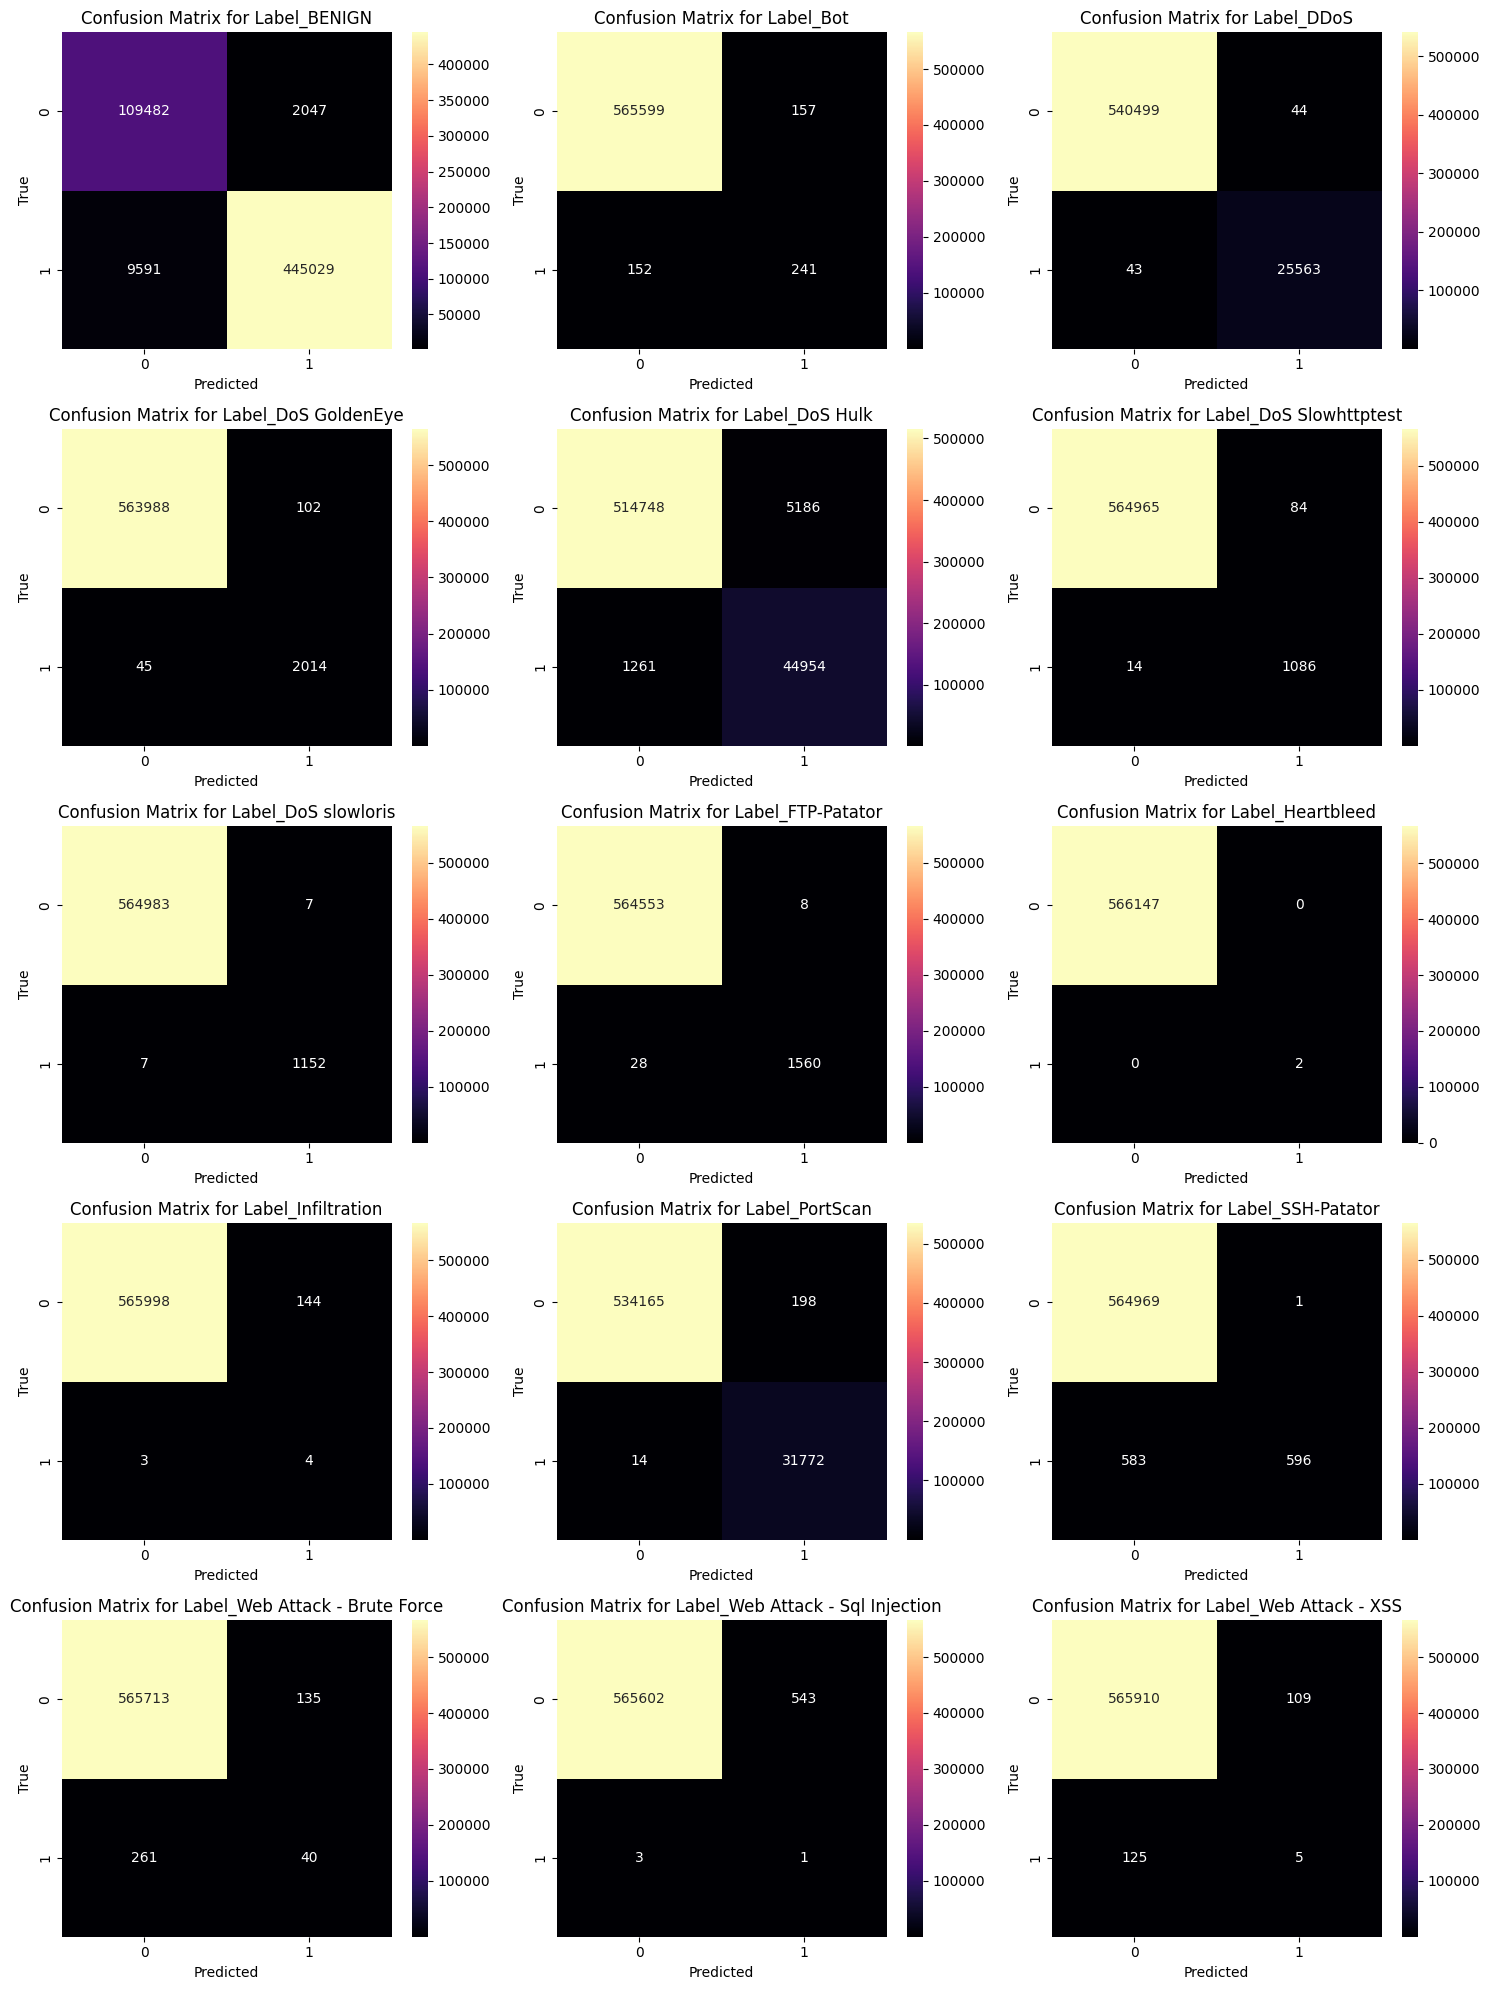

In [ ]:
# Plot confusion matrices for each label
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, label in enumerate(class_labels):
    sns.heatmap(multi_conf_matrix[i], annot=True, fmt='d', cmap='magma', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions
y_pred = xgb_final.predict(X_test_normalized)

# Evaluate using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
y_train.shape

(1811675, 15)

####RANDOMFOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'criterion': ['entropy', 'gini']
}
# Create a Random Forest classifier
rf = RandomForestClassifier(oob_score=True, class_weight='balanced', random_state=1, n_jobs=-1)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the data to perform grid search
grid_search.fit(X_train_normalized, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters
print("Best Parameters:", best_params)

# Create the final Random Forest classifier using the best parameters
rf_final = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'],
                                   criterion=best_params['criterion'],
                                   oob_score=True,
                                   class_weight='balanced',
                                   random_state=1,
                                   n_jobs=-1)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}


In [ ]:
#Fitting the model
rf_final.fit(X_train_normalized, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150, n_jobs=-1,
                       oob_score=True, random_state=1)

In [ ]:
# Predicting on the validation set
y_val_pred = rf_final.predict(X_val_normalized)

In [ ]:
import time

# Start time
start_time = time.time()

# Make predictions
y_pred = rf_final.predict(X_test_normalized)

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Time taken for predicting:", execution_time, "seconds")

Time taken for predicting: 43.0299596786499 seconds


In [ ]:
# Define the number of data points you want to test
num_data_points = [1, 50, 100, 500,5000]

for num_points in num_data_points:
    # Take a subset of X_test_normalized with the specified number of data points
    X_subset = X_test_normalized[:num_points]

    # Start time
    start_time = time.time()

    # Make predictions
    y_pred = rf_final.predict(X_subset)

    # End time
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    print("Time taken for predicting", num_points, "data points:", execution_time, "seconds")

Time taken for predicting 1 data points: 0.02919602394104004 seconds
Time taken for predicting 50 data points: 0.047669172286987305 seconds
Time taken for predicting 100 data points: 0.06254291534423828 seconds
Time taken for predicting 500 data points: 0.09014177322387695 seconds
Time taken for predicting 5000 data points: 0.2470684051513672 seconds


In [ ]:
from sklearn.metrics import accuracy_score
# Calculating accuracy on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Once you're satisfied with the model performance on the validation set, you can evaluate it on the test set
y_pred = rf_final.predict(X_test_normalized)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9158392560259119
Test Accuracy: 0.9155010430116454


In [ ]:
# Evaluating the model using mean squared error, mean absolute error, r2_score, and root mean squared error.
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
print("Accuracy Score ",metrics.accuracy_score(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error',mae)
mse = mse(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared value: ',rmse)

Accuracy Score  0.9155010430116454
Mean Absolute Error 0.010866750625718674
Mean Squared Error: 0.010866750625718674
Root Mean Squared value:  0.10424370784713423


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Precision: 0.9794666182755677
Recall: 0.9155010430116454
F1 Score: 0.9434803972645756
ROC-AUC Score: 0.8631732753290918


In [ ]:
#Classification Report for the results
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94    454620
           1       0.02      0.80      0.05       393
           2       1.00      1.00      1.00     25606
           3       0.97      0.98      0.97      2059
           4       0.82      1.00      0.90     46215
           5       0.94      0.98      0.96      1100
           6       0.97      0.99      0.98      1159
           7       0.95      1.00      0.97      1588
           8       1.00      1.00      1.00         2
           9       0.05      0.14      0.07         7
          10       0.99      1.00      1.00     31786
          11       0.06      0.94      0.10      1179
          12       0.19      0.19      0.19       301
          13       0.00      0.00      0.00         4
          14       0.02      0.08      0.03       130

   micro avg       0.92      0.92      0.92    566149
   macro avg       0.60      0.73      0.61    566149
weighted avg       0.98   

In [ ]:
# Print the OOB error estimate to check for overfitting during the training
print("OOB error estimate: ", 1 - rf_final.oob_score_)
from sklearn.metrics import confusion_matrix

OOB error estimate:  0.08363917369285334


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the class labels
class_labels = [
    'Label_BENIGN', 'Label_Bot', 'Label_DDoS', 'Label_DoS GoldenEye',
    'Label_DoS Hulk', 'Label_DoS Slowhttptest', 'Label_DoS slowloris',
    'Label_FTP-Patator', 'Label_Heartbleed', 'Label_Infiltration',
    'Label_PortScan', 'Label_SSH-Patator', 'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection', 'Label_Web Attack - XSS'
]

# Compute multilabel confusion matrix
multi_conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

# Print the confusion matrix for each label
for i, label in enumerate(class_labels):
    print(f"Confusion Matrix for {label}:")
    print(multi_conf_matrix[i])
    print("\n")

Confusion Matrix for Label_BENIGN:
[[110875    654]
 [ 46985 407635]]


Confusion Matrix for Label_Bot:
[[552720  13036]
 [    78    315]]


Confusion Matrix for Label_DDoS:
[[540468     75]
 [    61  25545]]


Confusion Matrix for Label_DoS GoldenEye:
[[564033     57]
 [    51   2008]]


Confusion Matrix for Label_DoS Hulk:
[[509547  10387]
 [   169  46046]]


Confusion Matrix for Label_DoS Slowhttptest:
[[564977     72]
 [    20   1080]]


Confusion Matrix for Label_DoS slowloris:
[[564953     37]
 [     8   1151]]


Confusion Matrix for Label_FTP-Patator:
[[564480     81]
 [     5   1583]]


Confusion Matrix for Label_Heartbleed:
[[566147      0]
 [     0      2]]


Confusion Matrix for Label_Infiltration:
[[566122     20]
 [     6      1]]


Confusion Matrix for Label_PortScan:
[[534164    199]
 [    11  31775]]


Confusion Matrix for Label_SSH-Patator:
[[546051  18919]
 [    76   1103]]


Confusion Matrix for Label_Web Attack - Brute Force:
[[565615    233]
 [   245     56]]


Con

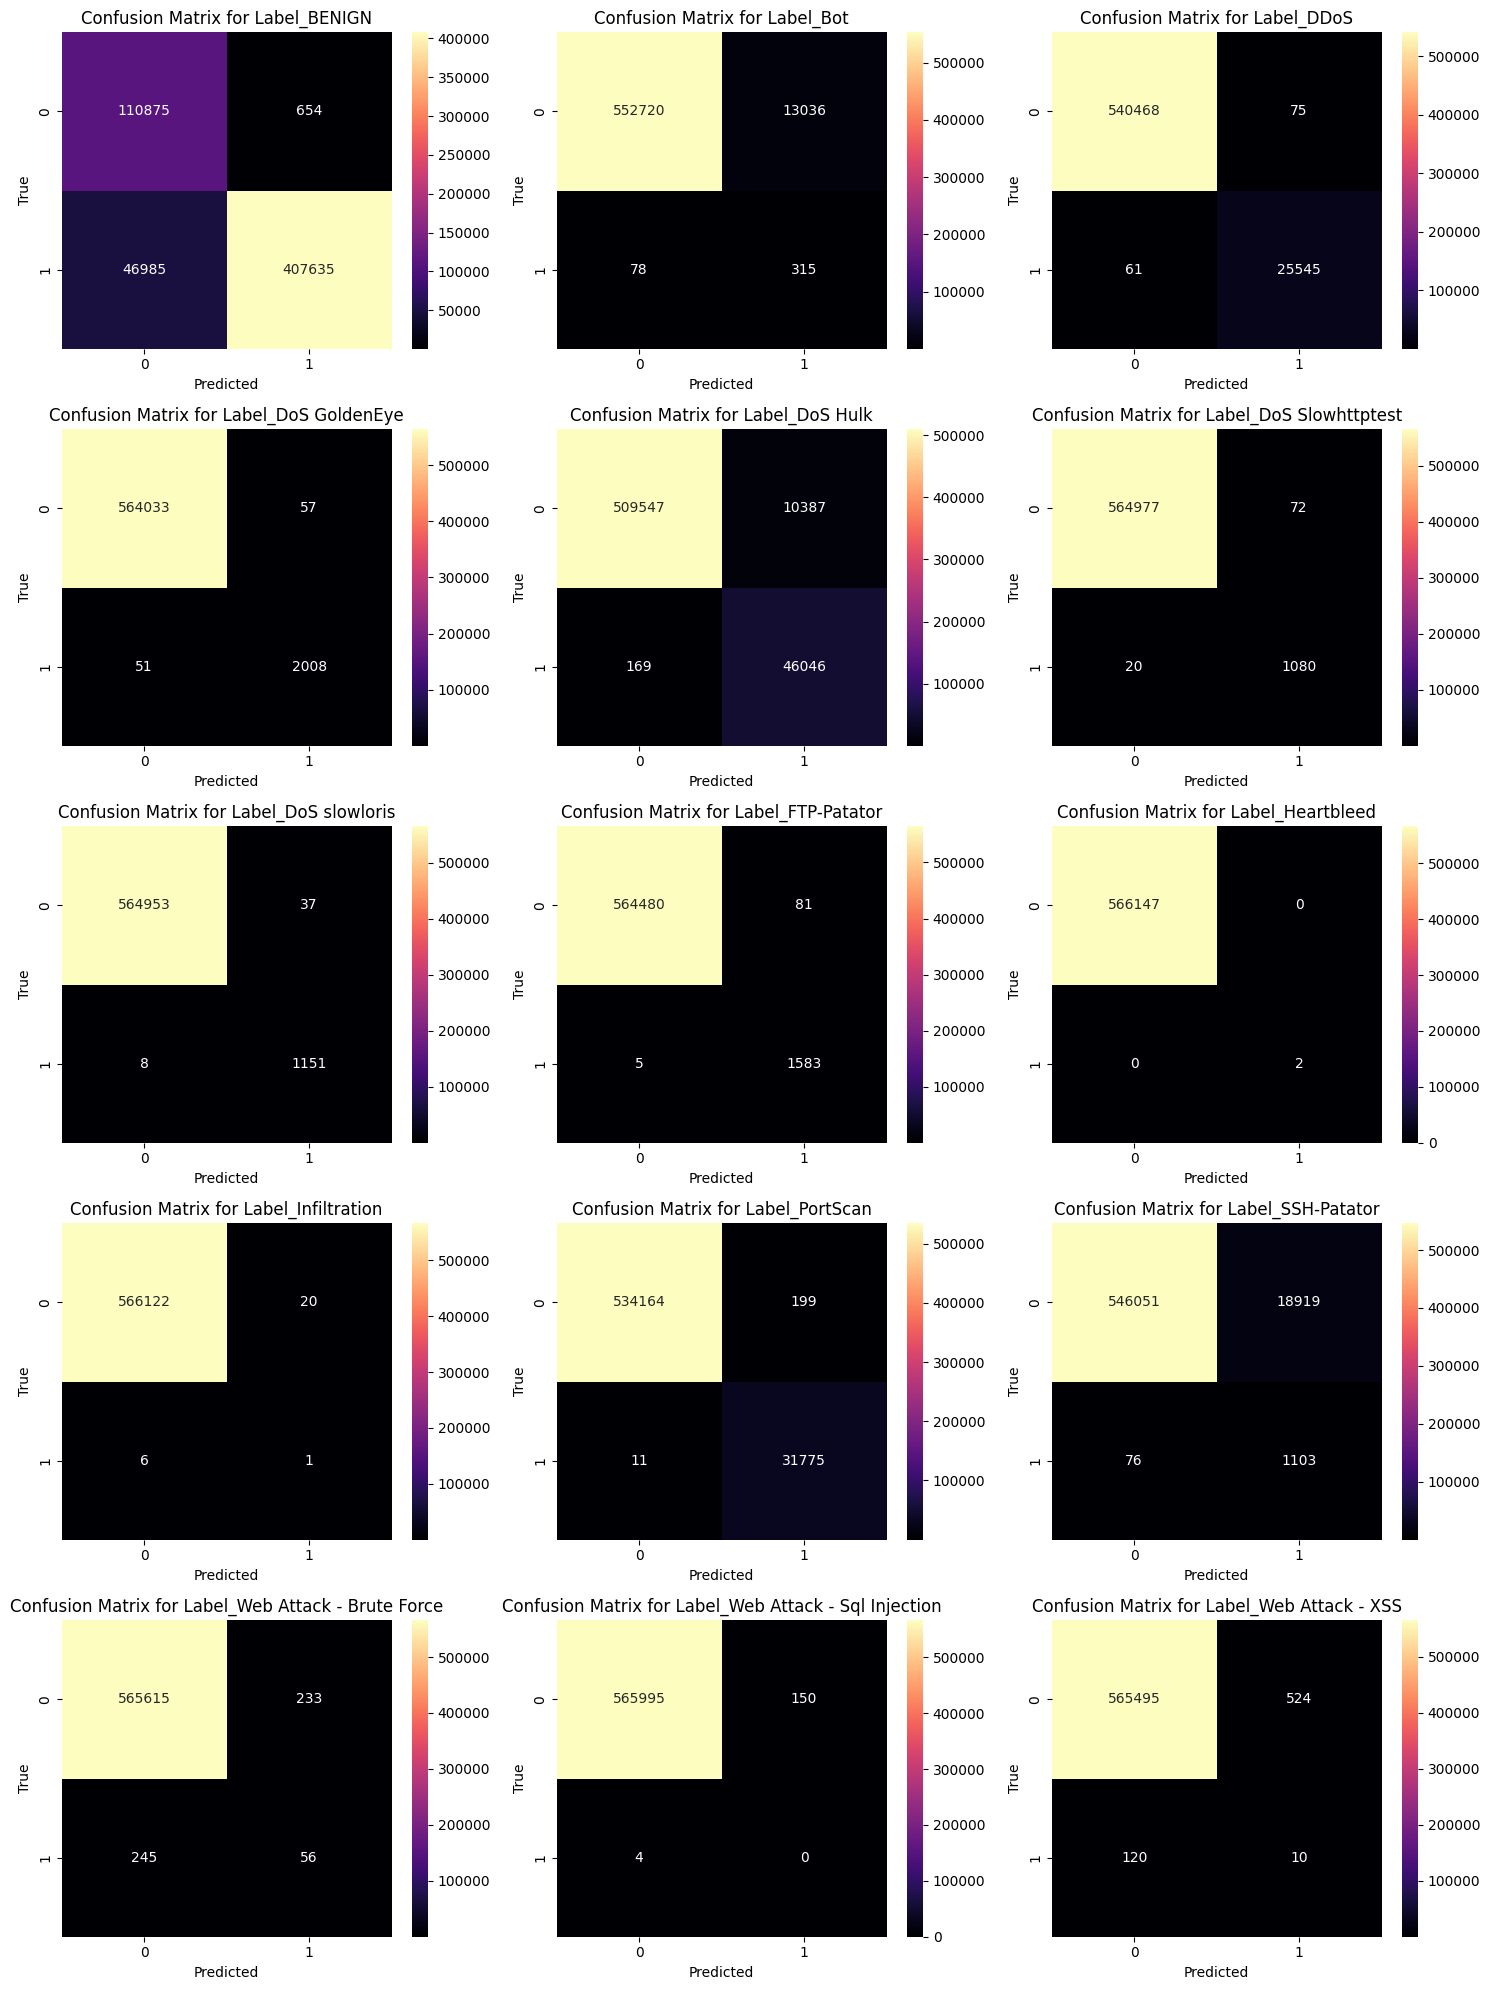

In [ ]:
# Plot confusion matrices for each label
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, label in enumerate(class_labels):
    sns.heatmap(multi_conf_matrix[i], annot=True, fmt='d', cmap='magma', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
import joblib
# Specify the file path where you want to save the model
model_path = 'rf_model.joblib'

# Save the model
joblib.dump(rf, model_path)

print("Model saved successfully at:", model_path)

Model saved successfully at: rf_model.joblib


####HYBRID MODEL (CNN + LSTM)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

X_val_normalized = scaler.transform(X_val)

In [ ]:
print("Predicted probabilities shape:", y_pred.shape)  # Should be (n_samples, 15)

Predicted probabilities shape: (566149, 15)


In [ ]:
X_train_normalized.shape[0]

1811675

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Input, concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf

# Reshaping the data for Conv1D layer
X_train_cnn = X_train_normalized.reshape((X_train_normalized.shape[0], X_train_normalized.shape[1], 1))
X_test_cnn = X_test_normalized.reshape((X_test_normalized.shape[0], X_test_normalized.shape[1], 1))
X_val_cnn = X_val_normalized.reshape((X_val_normalized.shape[0], X_val_normalized.shape[1], 1))

X_train_lstm = X_train_normalized.reshape((X_train_normalized.shape[0], X_train_normalized.shape[1], 1))
X_test_lstm = X_test_normalized.reshape((X_test_normalized.shape[0], X_test_normalized.shape[1], 1))
X_val_lstm = X_val_normalized.reshape((X_val_normalized.shape[0], X_val_normalized.shape[1], 1))

# 1D CNN model
cnn_input = Input(shape=(X_train_cnn.shape[1], 1))
cnn_model = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn_model = MaxPooling1D(pool_size=2)(cnn_model)
cnn_model = Flatten()(cnn_model)

# Define LSTM model
lstm_input = Input(shape=(X_train_lstm.shape[1], 1))
lstm_model = LSTM(50, activation='relu')(lstm_input)

# Combine both models
combined_model = concatenate([cnn_model, lstm_model])

# Add a fully connected layer
combined_model = Dense(64, activation='relu')(combined_model)
combined_model = Dense(15, activation='softmax')(combined_model)

# Create the hybrid model
hybrid_model = Model(inputs=[cnn_input, lstm_input], outputs=combined_model)

# Compile the model
hybrid_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

hybrid_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 17, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 15, 64)         │            256 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 7, 64)          │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 17, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 448)            │              0 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 50)             │         10,400 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 498)            │              0 │ flatten_2[0][0],       │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │         31,936 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 15)             │            975 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 43,567 (170.18 KB)

 Trainable params: 43,567 (170.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with additional metrics
hybrid_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = hybrid_model.fit([X_train_cnn, X_train_normalized], y_train, epochs=3, batch_size=32, validation_data=([X_val_cnn, X_val_normalized], y_val), callbacks=[es])

# Evaluate the model
loss, accuracy = hybrid_model.evaluate([X_test_cnn, X_test_normalized], y_test)

Epoch 1/3
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 581s 10ms/step - accuracy: 0.9358 - loss: 0.1845 - val_accuracy: 0.9548 - val_loss: 0.1075
Epoch 2/3
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 589s 10ms/step - accuracy: 0.9532 - loss: 0.1071 - val_accuracy: 0.9536 - val_loss: 0.0986
Epoch 3/3
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 591s 10ms/step - accuracy: 0.9562 - loss: 0.0968 - val_accuracy: 0.9583 - val_loss: 0.0884
17693/17693 ━━━━━━━━━━━━━━━━━━━━ 72s 4ms/step - accuracy: 0.9583 - loss: 0.0887


In [ ]:
import time

# Start time
start_time = time.time()

# Make predictions for all data points
y_pred = hybrid_model.predict([X_test_cnn, X_test_normalized])

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Time taken for predicting all data points:", execution_time, "seconds")

17693/17693 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step
Time taken for predicting all data points: 84.2838921546936 seconds


In [ ]:
import time

# Define the number of data points you want to test
num_data_points = [1, 50, 100, 500, 5000]

for num_points in num_data_points:
    # Take a subset of X_test_normalized with the specified number of data points
    X_subset_normalized = X_test_normalized[:num_points]
    X_subset_cnn = X_test_cnn[:num_points]

    # Start time
    start_time = time.time()

    # Make predictions
    y_pred = hybrid_model.predict([X_subset_cnn, X_subset_normalized])

    # End time
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    print("Time taken for predicting", num_points, "data points:", execution_time, "seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Time taken for predicting 1 data points: 0.08617043495178223 seconds
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Time taken for predicting 50 data points: 0.09509682655334473 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Time taken for predicting 100 data points: 0.10052752494812012 seconds
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Time taken for predicting 500 data points: 0.14993023872375488 seconds
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Time taken for predicting 5000 data points: 0.772442102432251 seconds


In [ ]:
print("Loss of the hybrid model:", loss)
print("Accuracy of the hybrid model:", accuracy)

Loss of the hybrid model: 0.08877179026603699
Accuracy of the hybrid model: 0.9583749175071716


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np

# Predict on test data (CNN + LSTM hybrid model)
y_pred = hybrid_model.predict([X_test_cnn, X_test_normalized])

# Get the predicted classes by finding the index of the maximum predicted probability
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test to numpy array if necessary
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test

# Ensure correct shape for non-one-hot encoded y_test (if one-hot encoded, keep as is)
if len(y_test_np.shape) > 1:  # If it's one-hot encoded
    y_test_classes = np.argmax(y_test_np, axis=1)
else:
    y_test_classes = y_test_np  # Already in label form

# Compute evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

# For multi-class ROC AUC, use the multi-class option
# Assuming y_test is one-hot encoded (if not, ensure to one-hot encode it)
roc_auc = roc_auc_score(y_test_np, y_pred, multi_class='ovr', average='macro')

# Print the computed metrics
print("Accuracy:", accuracy)
print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1 Score (Macro):", f1)
print("ROC AUC Score (Macro, OVR):", roc_auc)

17693/17693 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step
Accuracy: 0.9583749154374556
Precision (Macro): 0.6904269087858077
Recall (Macro): 0.5634704819053665
F1 Score (Macro): 0.5856346315591682
ROC AUC Score (Macro, OVR): 0.9720082246334466


In [ ]:
print(y_test_np.shape, y_pred_classes.shape)

(566149, 15) (566149,)


In [ ]:
unique_classes_test = np.unique(y_test_np)
print("Classes in the test set:", unique_classes_test)
print("Number of classes in test set:", len(unique_classes_test))

Classes in the test set: [0 1]
Number of classes in test set: 2


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the class labels
class_labels = [
    'Label_BENIGN', 'Label_Bot', 'Label_DDoS', 'Label_DoS GoldenEye',
    'Label_DoS Hulk', 'Label_DoS Slowhttptest', 'Label_DoS slowloris',
    'Label_FTP-Patator', 'Label_Heartbleed', 'Label_Infiltration',
    'Label_PortScan', 'Label_SSH-Patator', 'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection', 'Label_Web Attack - XSS'
]

# Convert predictions to binary values (0 or 1) based on a threshold
threshold = 0.5 #Example threshold
y_pred_binary = (y_pred > threshold).astype(int)

# Compute multilabel confusion matrix
multi_conf_matrix = multilabel_confusion_matrix(y_test, y_pred_binary)

# Print the confusion matrix for each label
for i, label in enumerate(class_labels):
    print(f"Confusion Matrix for {label}:")
    print(multi_conf_matrix[i])
    print("\n")

Confusion Matrix for Label_BENIGN:
[[ 95954  15575]
 [  7810 446810]]


Confusion Matrix for Label_Bot:
[[565735     21]
 [   257    136]]


Confusion Matrix for Label_DDoS:
[[540431    112]
 [   707  24899]]


Confusion Matrix for Label_DoS GoldenEye:
[[563953    137]
 [   261   1798]]


Confusion Matrix for Label_DoS Hulk:
[[519637    297]
 [ 13906  32309]]


Confusion Matrix for Label_DoS Slowhttptest:
[[564873    176]
 [    24   1076]]


Confusion Matrix for Label_DoS slowloris:
[[564912     78]
 [    89   1070]]


Confusion Matrix for Label_FTP-Patator:
[[564408    153]
 [    18   1570]]


Confusion Matrix for Label_Heartbleed:
[[566147      0]
 [     2      0]]


Confusion Matrix for Label_Infiltration:
[[566139      3]
 [     6      1]]


Confusion Matrix for Label_PortScan:
[[527550   6813]
 [    33  31753]]


Confusion Matrix for Label_SSH-Patator:
[[564969      1]
 [   593    586]]


Confusion Matrix for Label_Web Attack - Brute Force:
[[565846      2]
 [   290     11]]


Con

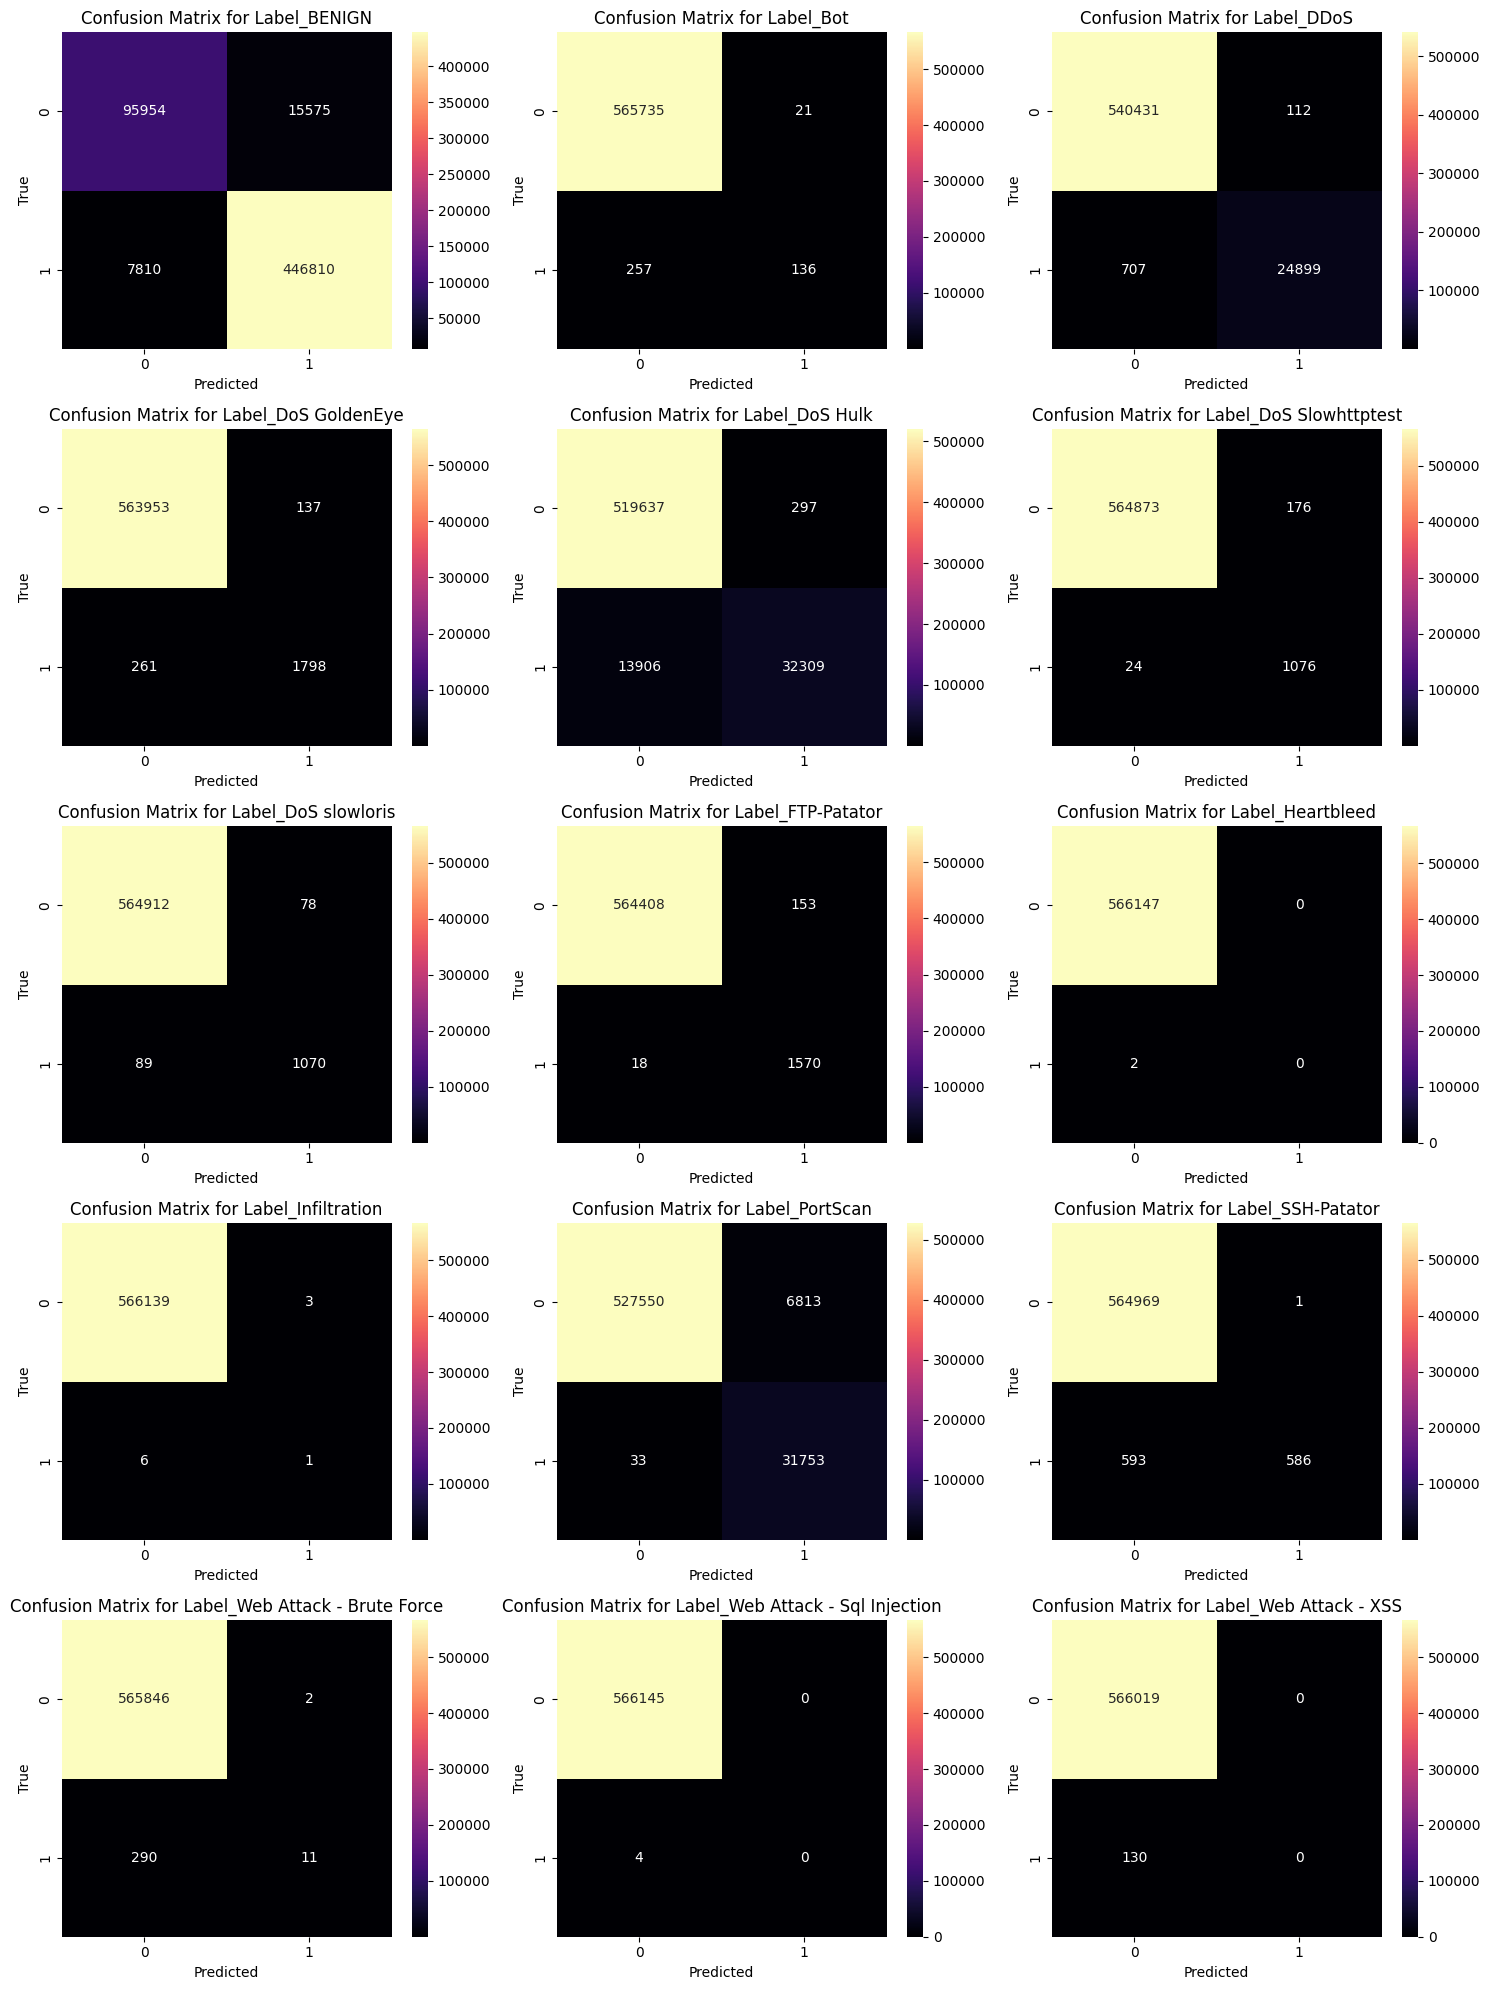

In [ ]:
# Plot confusion matrices for each label
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, label in enumerate(class_labels):
    sns.heatmap(multi_conf_matrix[i], annot=True, fmt='d', cmap='magma', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
# Specify the file path where you want to save the model
model_path = 'hybrid_model.h5'

# Save the model
hybrid_model.save(model_path)

print("Model saved successfully at:", model_path)

Model saved successfully at: hybrid_model.h5


In [ ]:
# Save the model
hybrid_model.save('hybrid_model.h5')  # Save as a single HDF5 file

In [ ]:
# Save the model in the native Keras format
hybrid_model.save('hybrid_model.keras')

####ID CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

num_classes = 15
# Reshape the input data to include a channel dimension
# Reshape the input test data to include a channel dimension
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape[0], X_test_normalized.shape[1], 1)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape[0], X_train_normalized.shape[1], 1)
X_val_reshaped = X_val_normalized.reshape(X_val_normalized.shape[0], X_val_normalized.shape[1], 1)

# Define the CNN model
model_cnn = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Optional dropout layer for regularization
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 15, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 5, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,783 (96.81 KB)

 Trainable params: 24,783 (96.81 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with additional metrics
model_cnn.compile(optimizer=optimizer, loss='sparsecategorical_crossentropy', metrics=['accuracy'])

# Train the model
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_cnn.fit(X_train_reshaped, y_train, epochs=3, batch_size=32, validation_data=(X_val_reshaped, y_val), callbacks=[es])

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test_reshaped, y_test)

Epoch 1/3
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 222s 4ms/step - accuracy: 0.9200 - loss: 0.2346 - val_accuracy: 0.9403 - val_loss: 0.1485
Epoch 2/3
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 217s 4ms/step - accuracy: 0.9401 - loss: 0.1523 - val_accuracy: 0.9428 - val_loss: 0.1417
Epoch 3/3
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 219s 4ms/step - accuracy: 0.9413 - loss: 0.1491 - val_accuracy: 0.9439 - val_loss: 0.1404
17693/17693 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9439 - loss: 0.1395


In [ ]:
import time

# Start time
start_time = time.time()

# Make predictions for all data points
y_pred = model_cnn.predict([X_test_reshaped])

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Time taken for predicting all data points:", execution_time, "seconds")

17693/17693 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step
Time taken for predicting all data points: 46.24455237388611 seconds


In [ ]:
import time

# Define the number of data points you want to test
num_data_points = [1, 50, 100, 500, 5000]

for num_points in num_data_points:
    # Take a subset of X_test_normalized with the specified number of data points
    X_subset_reshaped= X_test_reshaped[:num_points]

    # Start time
    start_time = time.time()

    # Make predictions
    y_pred = model_cnn.predict([X_subset_reshaped])

    # End time
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    print("Time taken for predicting", num_points, "data points:", execution_time, "seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Time taken for predicting 1 data points: 0.07885575294494629 seconds
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Time taken for predicting 50 data points: 0.08881378173828125 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Time taken for predicting 100 data points: 0.07641768455505371 seconds
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Time taken for predicting 500 data points: 0.13301873207092285 seconds
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Time taken for predicting 5000 data points: 0.4694790840148926 seconds


In [ ]:
print("Loss of the 1D CNN model:", loss)
print("Accuracy of the 1D CNN model:", accuracy)

Loss of the 1D CNN model: 0.13840508460998535
Accuracy of the 1D CNN model: 0.944037675857544


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on test data
y_pred_probs = model_cnn.predict(X_test_reshaped)  # Get probabilities for each class
y_pred_classes = np.argmax(y_pred_probs, axis=1)   # Get predicted class labels

# Convert y_test to a numpy array if needed
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test

# Convert y_test_np to binary labels (assuming y_test is in one-hot encoded format)
y_test_multi = np.argmax(y_test_np, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_multi, y_pred_classes)
precision = precision_score(y_test_multi, y_pred_classes, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test_multi, y_pred_classes, average='weighted')          # Use 'weighted' for multiclass
f1 = f1_score(y_test_multi, y_pred_classes, average='weighted')                  # Use 'weighted' for multiclass

# Calculate ROC-AUC for multiclass (One-vs-Rest) using predicted probabilities
roc_auc = roc_auc_score(y_test_np, y_pred_probs, multi_class='ovr', average='macro')  # Use average='macro' or 'weighted'

# Print or use the computed metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

17693/17693 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
Accuracy: 0.9440377003227066
Precision: 0.9488353913680634
Recall: 0.9440377003227066
F1 Score: 0.9430682523417038
ROC AUC Score: 0.9583726343874329


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the class labels
class_labels = [
    'Label_BENIGN', 'Label_Bot', 'Label_DDoS', 'Label_DoS GoldenEye',
    'Label_DoS Hulk', 'Label_DoS Slowhttptest', 'Label_DoS slowloris',
    'Label_FTP-Patator', 'Label_Heartbleed', 'Label_Infiltration',
    'Label_PortScan', 'Label_SSH-Patator', 'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection', 'Label_Web Attack - XSS'
]

# Convert predictions to binary values (0 or 1) based on a threshold
threshold = 0.5 #Example threshold
y_pred_binary = (y_pred > threshold).astype(int)

# Compute multilabel confusion matrix
multi_conf_matrix = multilabel_confusion_matrix(y_test, y_pred_binary)

# Print the confusion matrix for each label
for i, label in enumerate(class_labels):
    print(f"Confusion Matrix for {label}:")
    print(multi_conf_matrix[i])
    print("\n")

Confusion Matrix for Label_BENIGN:
[[ 95124  16405]
 [ 15082 439538]]


Confusion Matrix for Label_Bot:
[[565756      0]
 [   393      0]]


Confusion Matrix for Label_DDoS:
[[540292    251]
 [   533  25073]]


Confusion Matrix for Label_DoS GoldenEye:
[[563685    405]
 [   405   1654]]


Confusion Matrix for Label_DoS Hulk:
[[518982    952]
 [ 13761  32454]]


Confusion Matrix for Label_DoS Slowhttptest:
[[564918    131]
 [   232    868]]


Confusion Matrix for Label_DoS slowloris:
[[564954     36]
 [   219    940]]


Confusion Matrix for Label_FTP-Patator:
[[564440    121]
 [    15   1573]]


Confusion Matrix for Label_Heartbleed:
[[566147      0]
 [     2      0]]


Confusion Matrix for Label_Infiltration:
[[566142      0]
 [     7      0]]


Confusion Matrix for Label_PortScan:
[[521145  13218]
 [    31  31755]]


Confusion Matrix for Label_SSH-Patator:
[[564954     16]
 [   588    591]]


Confusion Matrix for Label_Web Attack - Brute Force:
[[565848      0]
 [   301      0]]


Con

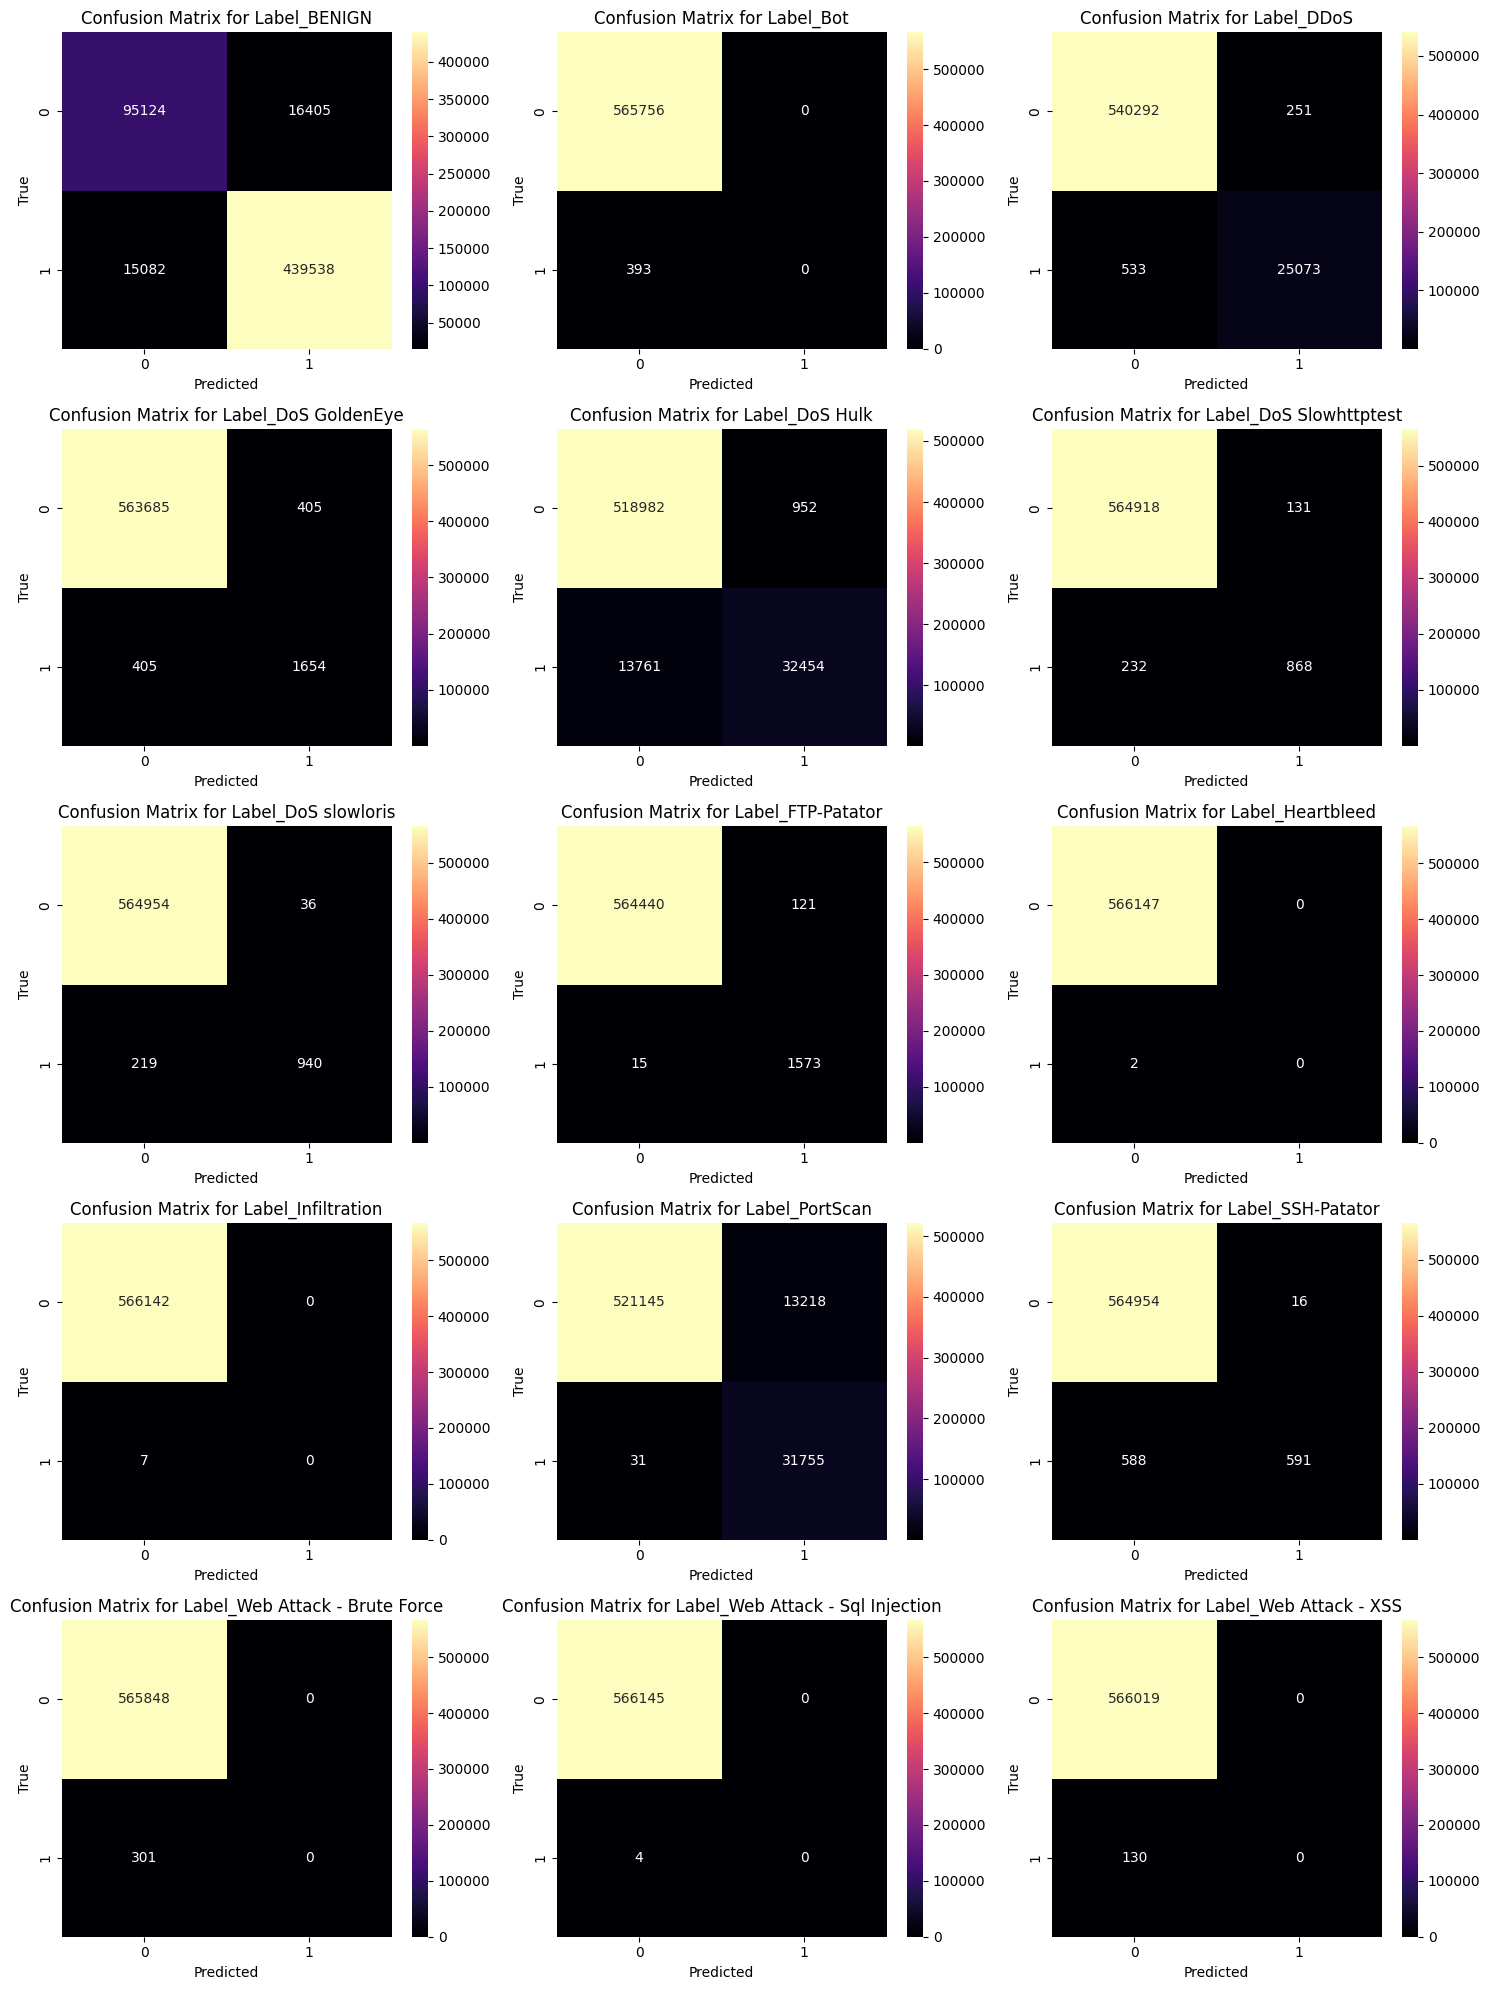

In [ ]:
# Plot confusion matrices for each label
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, label in enumerate(class_labels):
    sns.heatmap(multi_conf_matrix[i], annot=True, fmt='d', cmap='magma', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

####STACKED LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the model architecture
model = Sequential()

# Add the first LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_normalized.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=15, activation='softmax'))  # Assuming you have 2 classes for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 17, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 17, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 17, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 15)                  │             765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,565 (201.43 KB)

 Trainable params: 51,565 (201.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with additional metrics
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_normalized, y_train, epochs=5, batch_size=32, validation_data=(X_val_normalized, y_val), callbacks=[es])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_normalized, y_test)

Epoch 1/5
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 1447s 25ms/step - accuracy: 0.9233 - loss: 0.2344 - val_accuracy: 0.9494 - val_loss: 0.1104
Epoch 2/5
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 1420s 25ms/step - accuracy: 0.9496 - loss: 0.1229 - val_accuracy: 0.9533 - val_loss: 0.0990
Epoch 3/5
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 1412s 25ms/step - accuracy: 0.9536 - loss: 0.1046 - val_accuracy: 0.9543 - val_loss: 0.1294
Epoch 4/5
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 1427s 25ms/step - accuracy: 0.9552 - loss: 0.0990 - val_accuracy: 0.9568 - val_loss: 0.0957
Epoch 5/5
56615/56615 ━━━━━━━━━━━━━━━━━━━━ 1419s 25ms/step - accuracy: 0.9554 - loss: 0.0967 - val_accuracy: 0.9573 - val_loss: 0.0906
17693/17693 ━━━━━━━━━━━━━━━━━━━━ 129s 7ms/step - accuracy: 0.9570 - loss: 0.0914


In [ ]:
print("Loss of the Stacked LSTM model:", loss)
print("Accuracy of the Stacked LSTM model:", accuracy)

Loss of the Stacked LSTM model: 0.09124401956796646
Accuracy of the Stacked LSTM model: 0.957170307636261


In [ ]:
print("y_test_np shape:", y_test_np.shape)
print("y_pred_classes shape:", y_pred_classes.shape)
print("Unique values in y_test_np:", np.unique(y_test_np))
print("Unique values in y_pred_classes:", np.unique(y_pred_classes))

y_test_np shape: (566149, 15)
y_pred_classes shape: (566149,)
Unique values in y_test_np: [0 1]
Unique values in y_pred_classes: [ 0  1  2  3  4  5  6  7  9 10 11 12]
